# Exploratory Analysis of Water Quality Data I - Continuous Data (by stations)

# Temporal Patterns

This document includes Python code and results of the exploratory analysis of water quality data in the SEACAR Pilot project.

In [114]:
import matplotlib.pyplot as plt
import numpy      as np
import pandas     as pd
import geopandas  as gpd
import contextily as cx
import seaborn as sns
import warnings
import matplotlib

warnings.filterwarnings('ignore')
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

## 1. Data loading and preprocessing
Read the csv file of data.

In [124]:
df      = pd.read_csv(r"../OEAT_Continuous-2022-Nov-04.csv")
areaShp = gpd.read_file("../GIS_data/ORCP_Managed_Areas_Oct2021.shp")
fig_path = "../figures/"

Select five managed areas and six parameters. Select only columns that are needed for the analysis. Convert the SampleDate from string to datetime object.

In [6]:
df2 = df.loc[df["ManagedAreaName"].isin(["Guana Tolomato Matanzas National Estuarine Research Reserve",
                            "Biscayne Bay Aquatic Preserve",
                            "Estero Bay Aquatic Preserve",
                            "Gasparilla Sound-Charlotte Harbor Aquatic Preserve",
                            "Big Bend Seagrasses Aquatic Preserve"])]
df2 = df2[['RowID','ParameterName','ParameterUnits','ProgramLocationID','ActivityType','ManagedAreaName',
           'SampleDate','Year','Month','ResultValue','ValueQualifier','Latitude_DD','Longitude_DD']]
df2 = df2.loc[df2["ParameterName"].isin(["Salinity","Total Nitrogen","Dissolved Oxygen","Turbidity","Secchi Depth","Water Temperature"])]
df2["timestamp"]=  pd.to_datetime(df2['SampleDate'])

Remove outliers.

In [7]:
# Remove total nitrogen outliers (>100)
df2.drop(df2[(df2['ParameterName'] == 'Total Nitrogen') & 
    (df2['ResultValue'] > 100)].index,inplace=True)

# Remove a single measurement in 1996-07-22 (RowID: 1582917)
df2.drop(df2[df2['RowID'] == 1582917].index, inplace=True)

# Remove turbidity outliers (>25)
df2.drop(df2[(df2['ParameterName'] == 'Turbidity') & 
    (df2['ResultValue'] > 25)].index, inplace=True)

# Remove Secchi Depth before 1995 (117 records)
df2.drop(df2[(df2['ParameterName'] == 'Secchi Depth') & 
    (df2['Year'] < 1995)].index, inplace=True)

## 2. Exploratory Analysis
Create lists of water quality parameters, lists of five managed areas and list of statistics to be calculated.

In [39]:
listPara = ["Salinity","Total Nitrogen","Dissolved Oxygen","Turbidity","Secchi Depth","Water Temperature"] 
listArea = ["Guana Tolomato Matanzas National Estuarine Research Reserve",
                            "Biscayne Bay Aquatic Preserve",
                            "Estero Bay Aquatic Preserve",
                            "Gasparilla Sound-Charlotte Harbor Aquatic Preserve",
                            "Big Bend Seagrasses Aquatic Preserve" ]
listValue = ["count", "mean","max","min","std"]
dictUnits = {"Salinity":"ppt","Total Nitrogen": "mg/L","Dissolved Oxygen": "mg/L","Turbidity": "NTU", "Secchi Depth": "m" , "Water Temperature": "Degrees C"}
dictMonth = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",
             9:"September",10:"October",11:"November",12:"December"}

dictArea = {'Gasparilla Sound-Charlotte Harbor Aquatic Preserve':'Charlotte Harbor','Big Bend Seagrasses Aquatic Preserve':'Big Bend',
            'Guana Tolomato Matanzas National Estuarine Research Reserve':'GTM Reserve','Estero Bay Aquatic Preserve':'Estero Bay',
            'Biscayne Bay Aquatic Preserve':'Biscayne Bay'}

Calculate each parameters' Count, Max, Min, Mean, and STD of each areas in weekly, monthly, quarterly and yearly intervals.

In [9]:
weekly_count     = df2.groupby(["ParameterName","ManagedAreaName","ProgramLocationID",pd.Grouper(key="timestamp",freq="W")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
monthly_count    = df2.groupby(["ParameterName","ManagedAreaName","ProgramLocationID",pd.Grouper(key="timestamp",freq="M")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
quarterly_count  = df2.groupby(["ParameterName","ManagedAreaName","ProgramLocationID",pd.Grouper(key="timestamp",freq="Q")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
yearly_count     = df2.groupby(["ParameterName","ManagedAreaName","ProgramLocationID",pd.Grouper(key="timestamp",freq="Y")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()

Process geospatial data

In [97]:
dfLoc  = df2.groupby(['Latitude_DD','Longitude_DD',"ParameterName","ManagedAreaName","ProgramLocationID"])["ResultValue"].agg("count").reset_index()

dfLoc = dfLoc.rename(columns={"ResultValue": "samples"})

dfLoc.loc[dfLoc["samples"] == 1,['sample_type']] ='Random Point'
dfLoc.loc[dfLoc["samples"] > 1,['sample_type']] ='Fixed Point'

# Group data by location, parametername and managed area name
gdfLoc = gpd.GeoDataFrame(dfLoc, geometry = gpd.points_from_xy(dfLoc.Longitude_DD, dfLoc.Latitude_DD), crs="EPSG:4326").to_crs("EPSG:32617")

dfID  = pd.DataFrame(df2.groupby(["ProgramLocationID","Longitude_DD","Latitude_DD","ManagedAreaName"]).sum().reset_index())
dfID  = dfID[["ProgramLocationID","Longitude_DD","Latitude_DD","ManagedAreaName"]]
gdfID = gpd.GeoDataFrame(dfID, geometry = gpd.points_from_xy(dfID.Longitude_DD, dfID.Latitude_DD), crs="EPSG:4326").to_crs("EPSG:32617")

### 2.1 Monthly Count

Create line charts for sample **counts** in monthly intervals. These line charts shows sampling activity in different time periods.

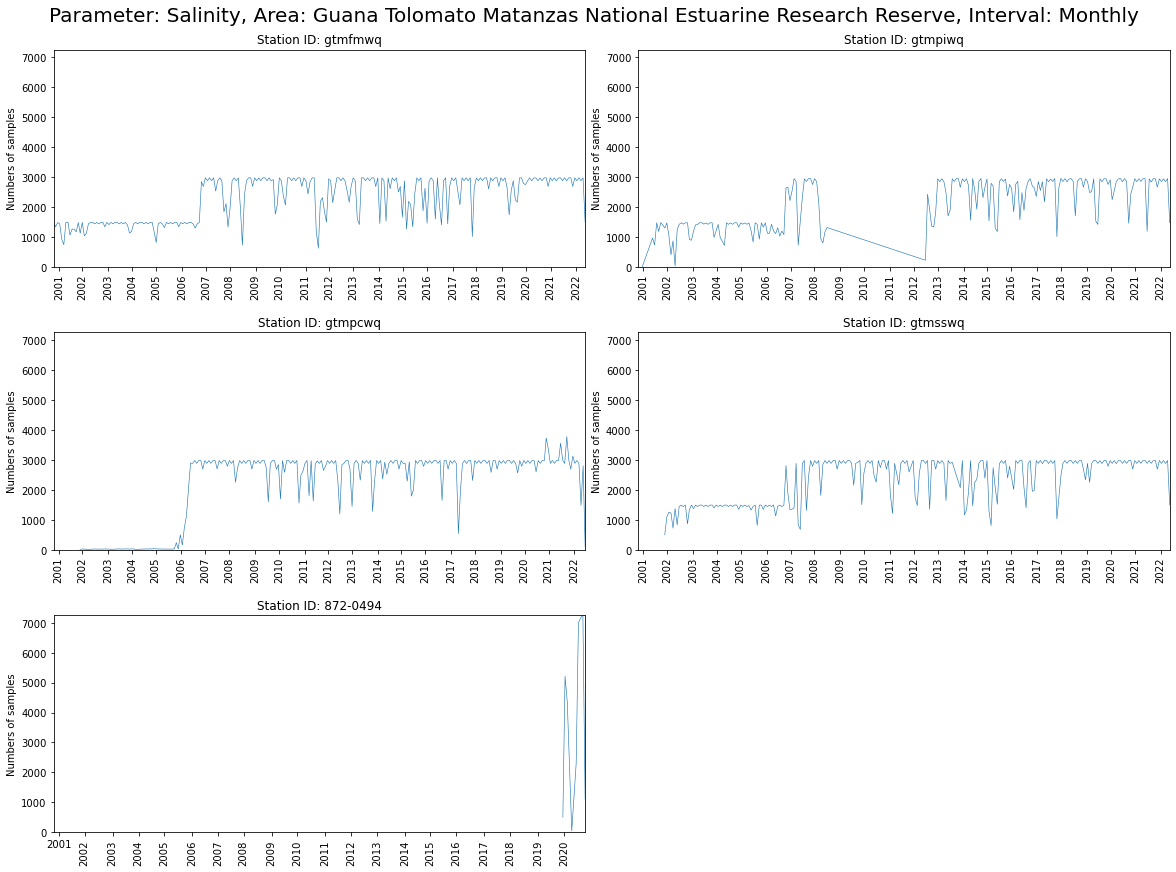

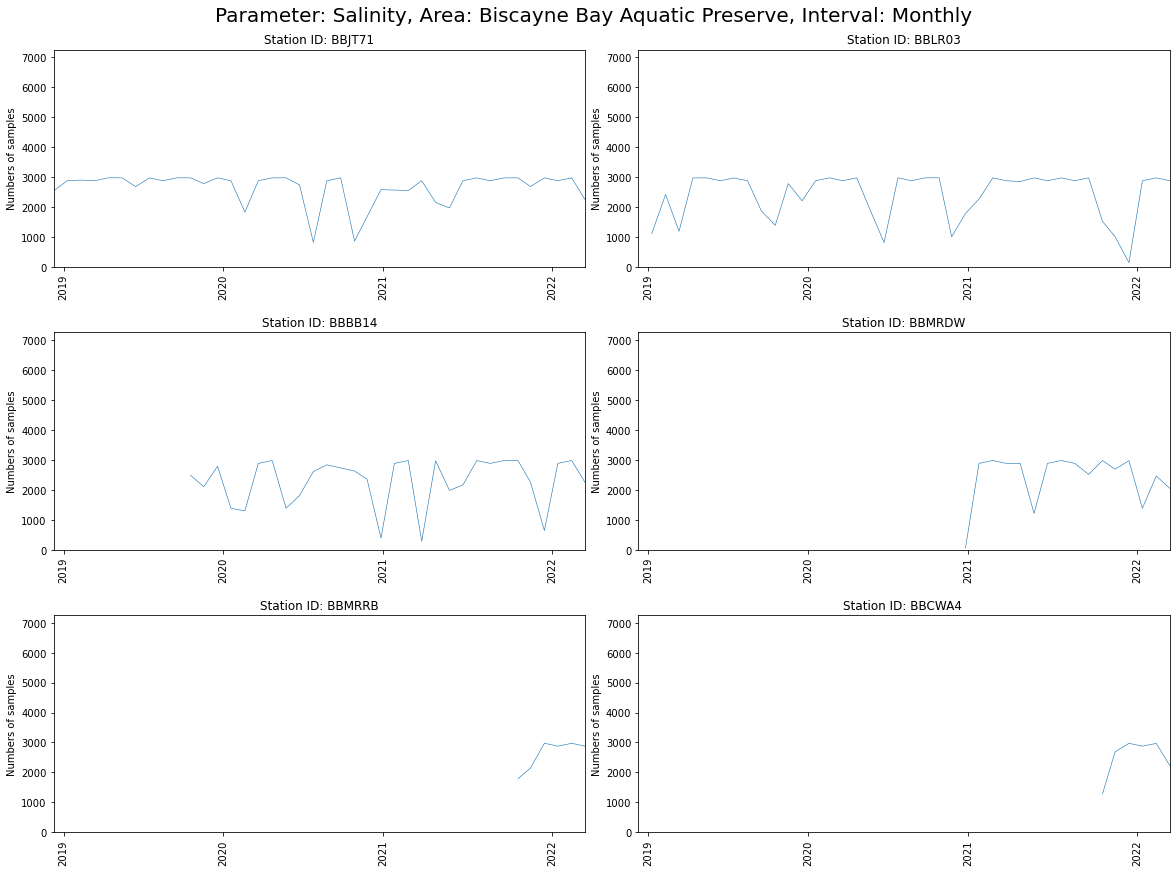

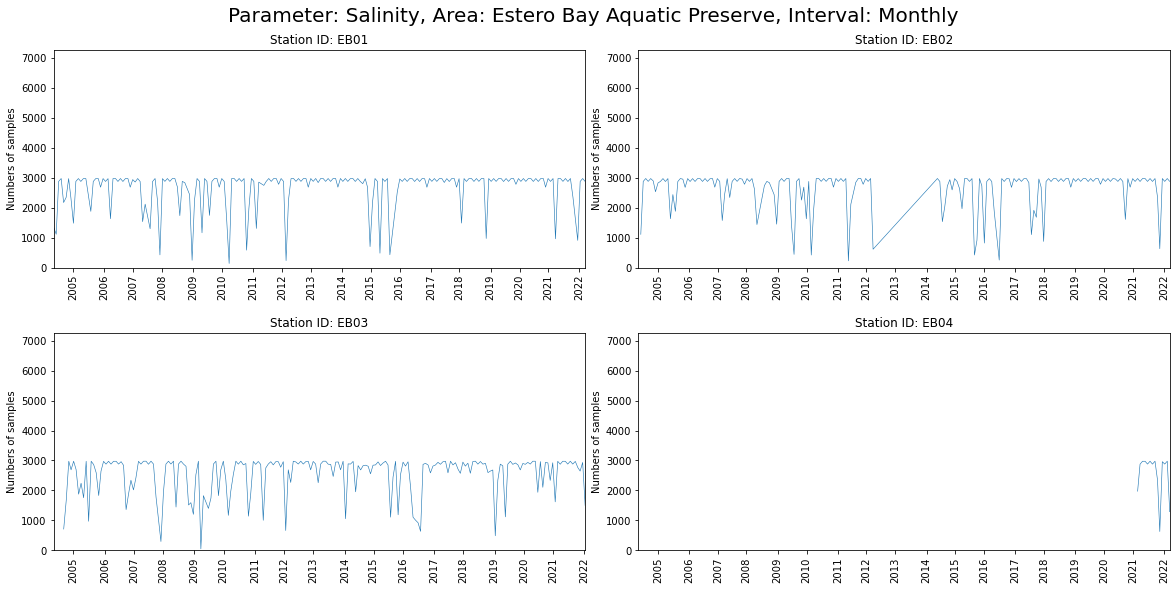

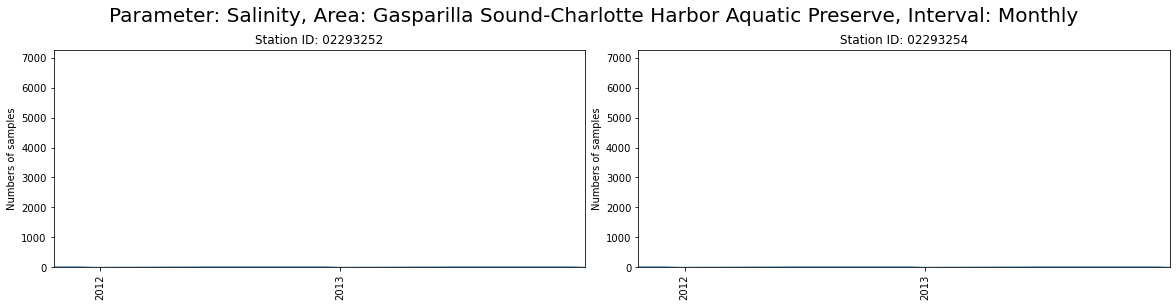

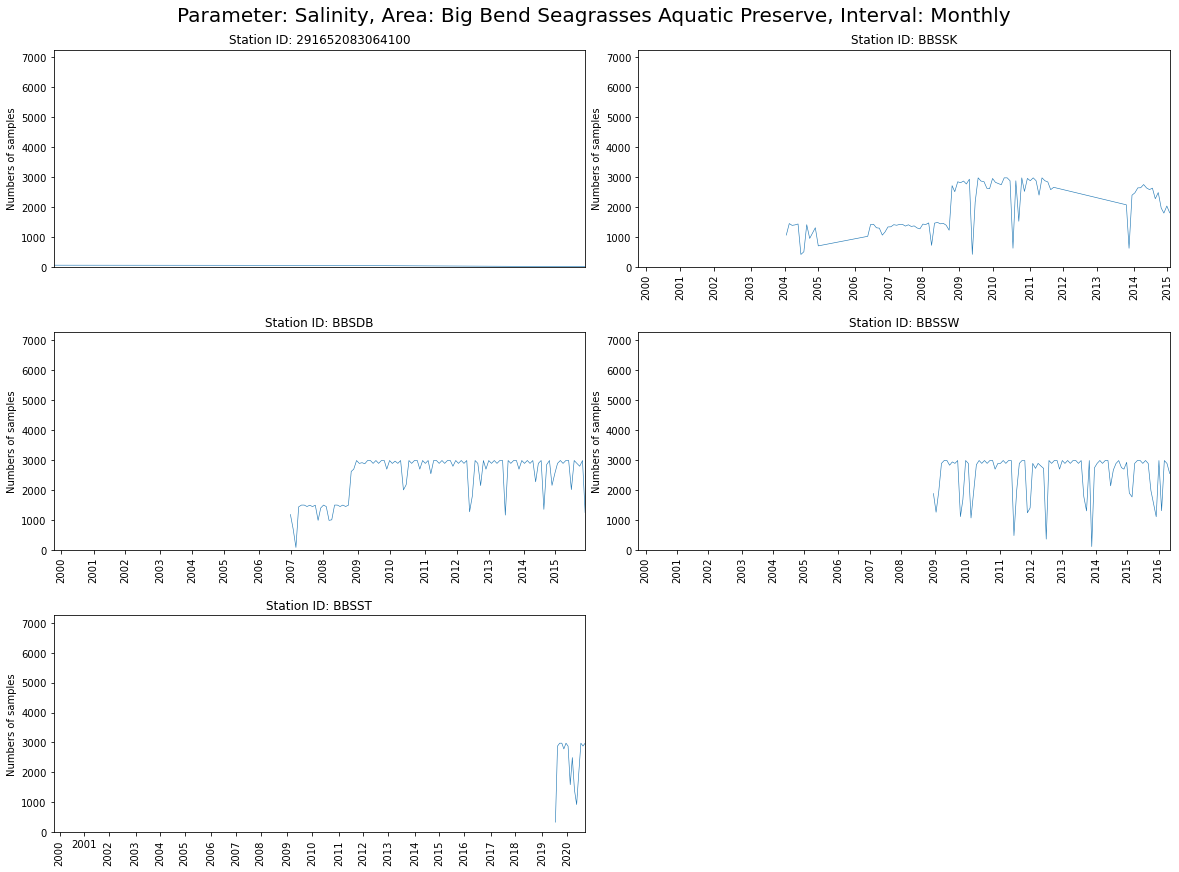

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

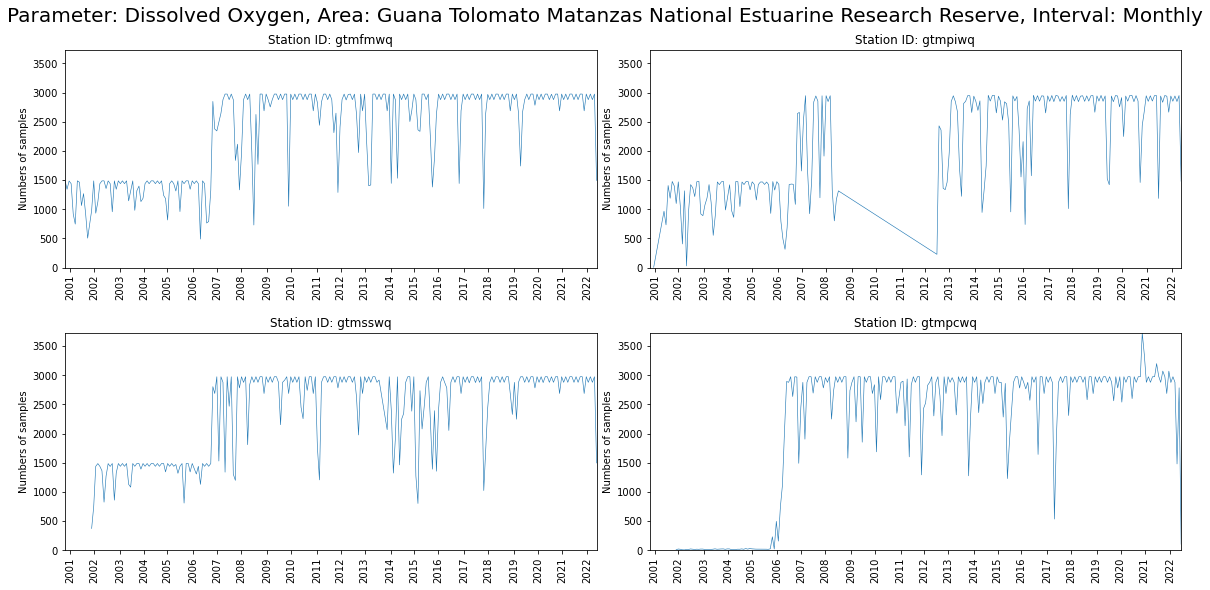

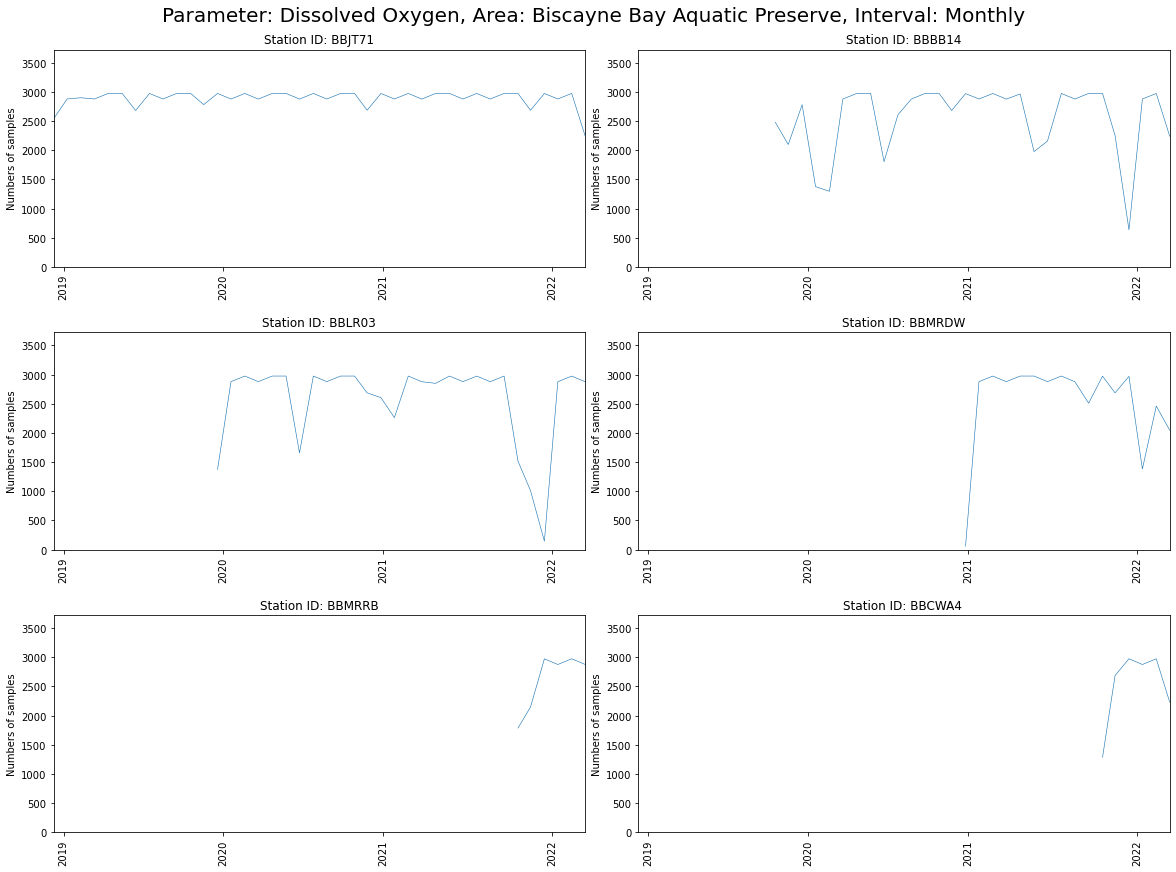

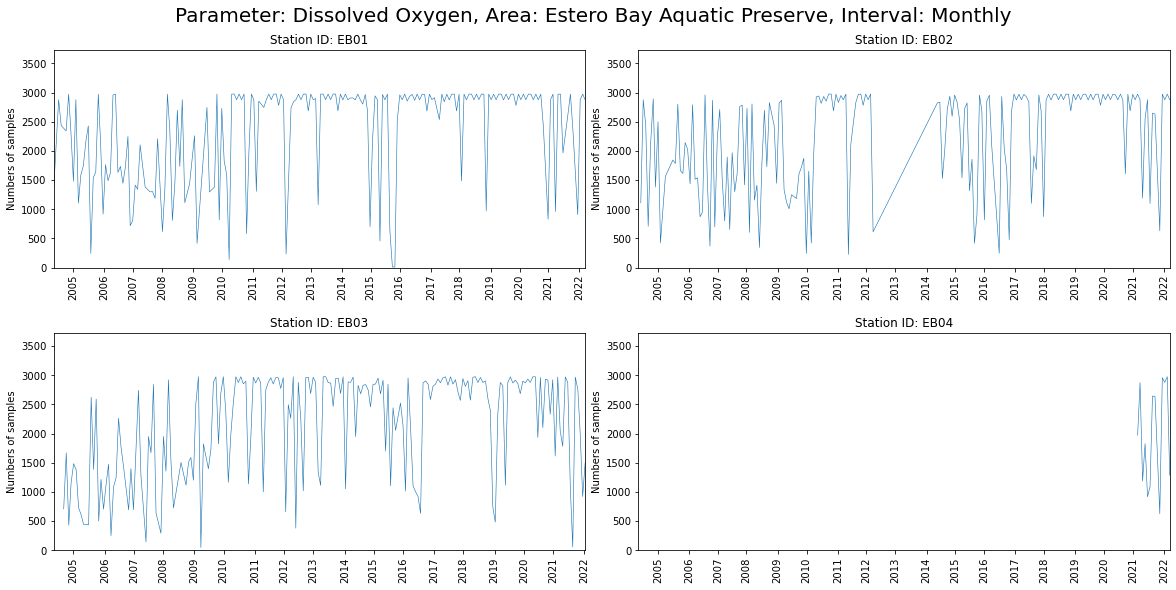

<Figure size 1440x2160 with 0 Axes>

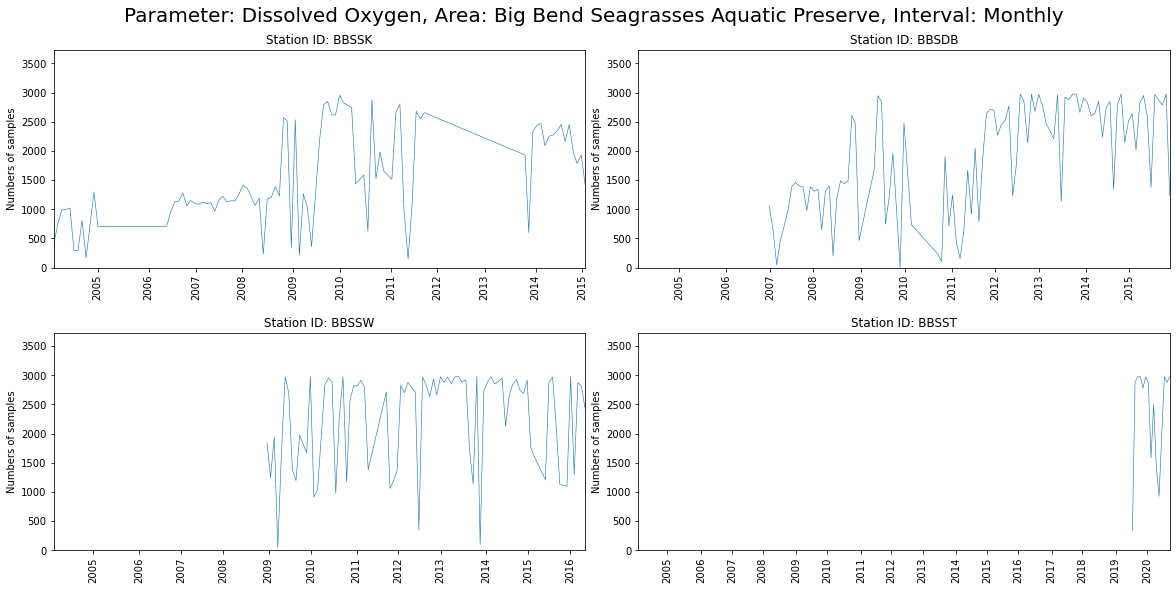

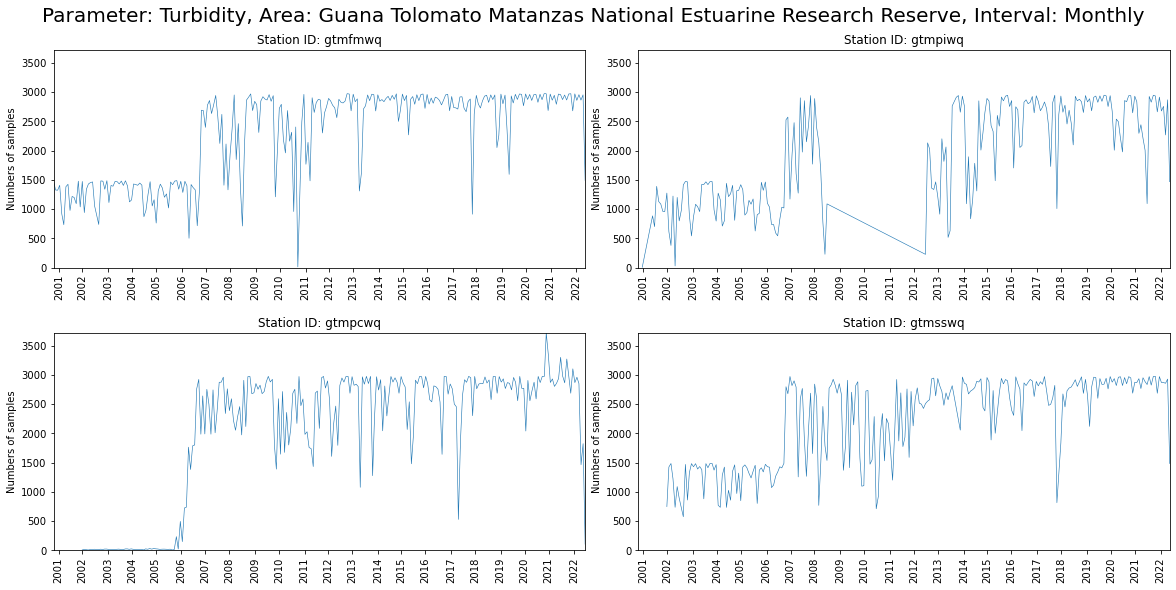

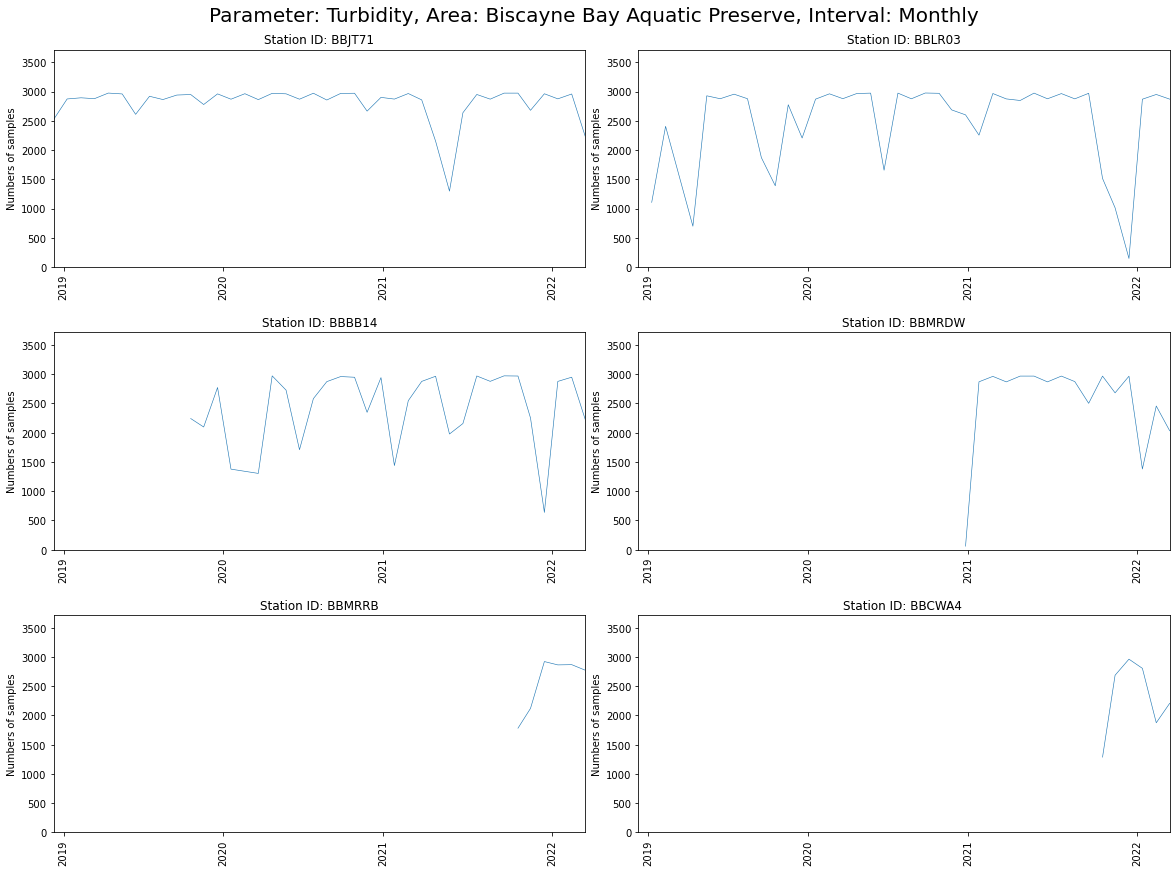

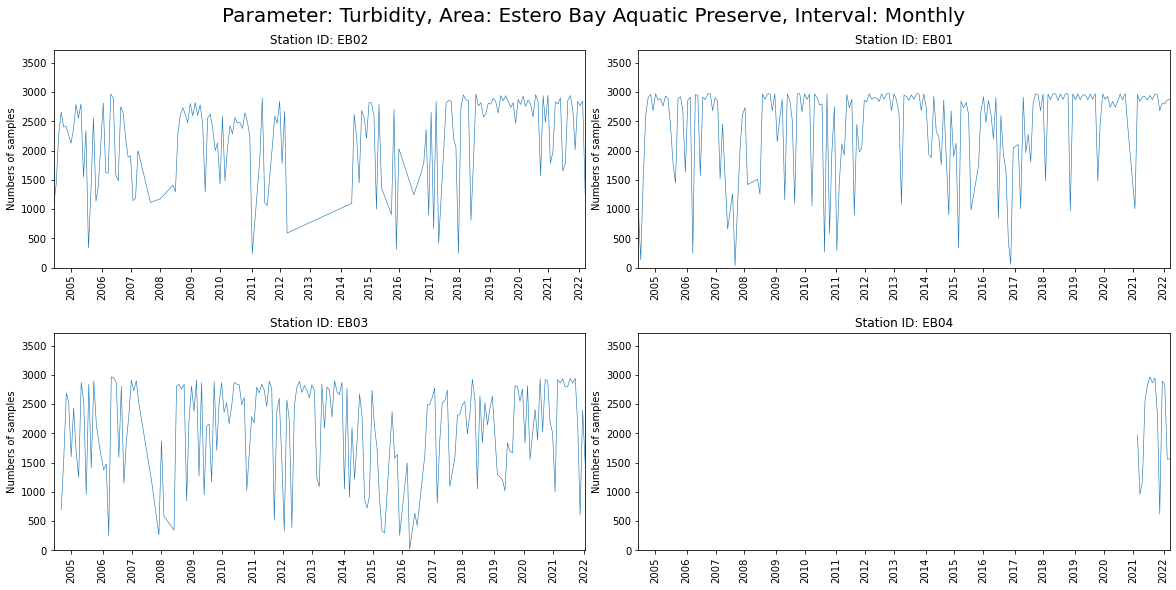

<Figure size 1440x2160 with 0 Axes>

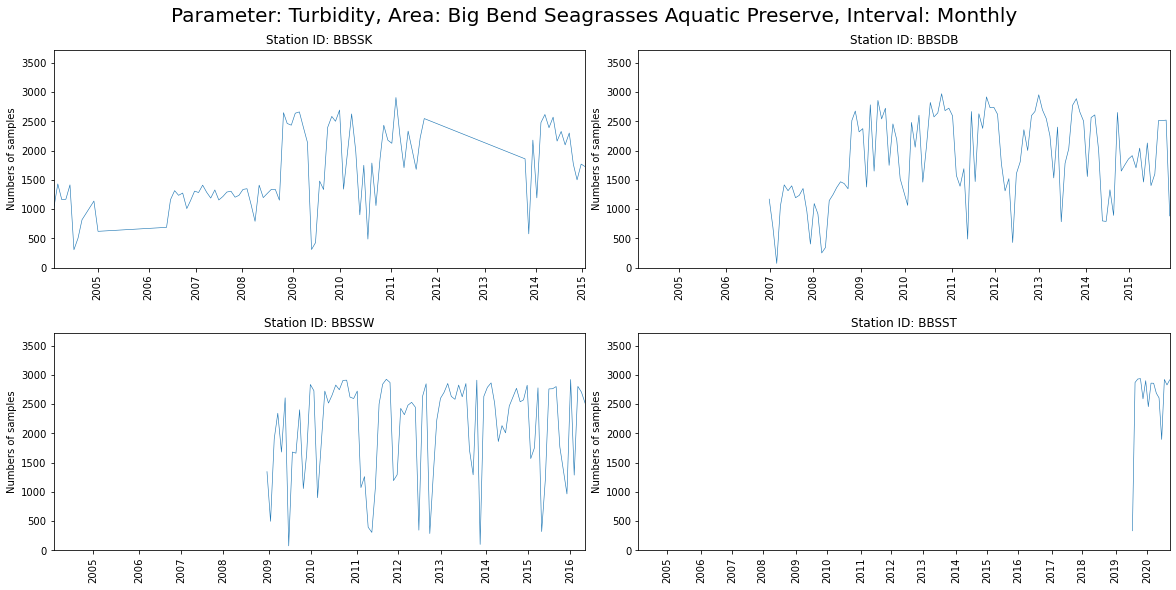

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

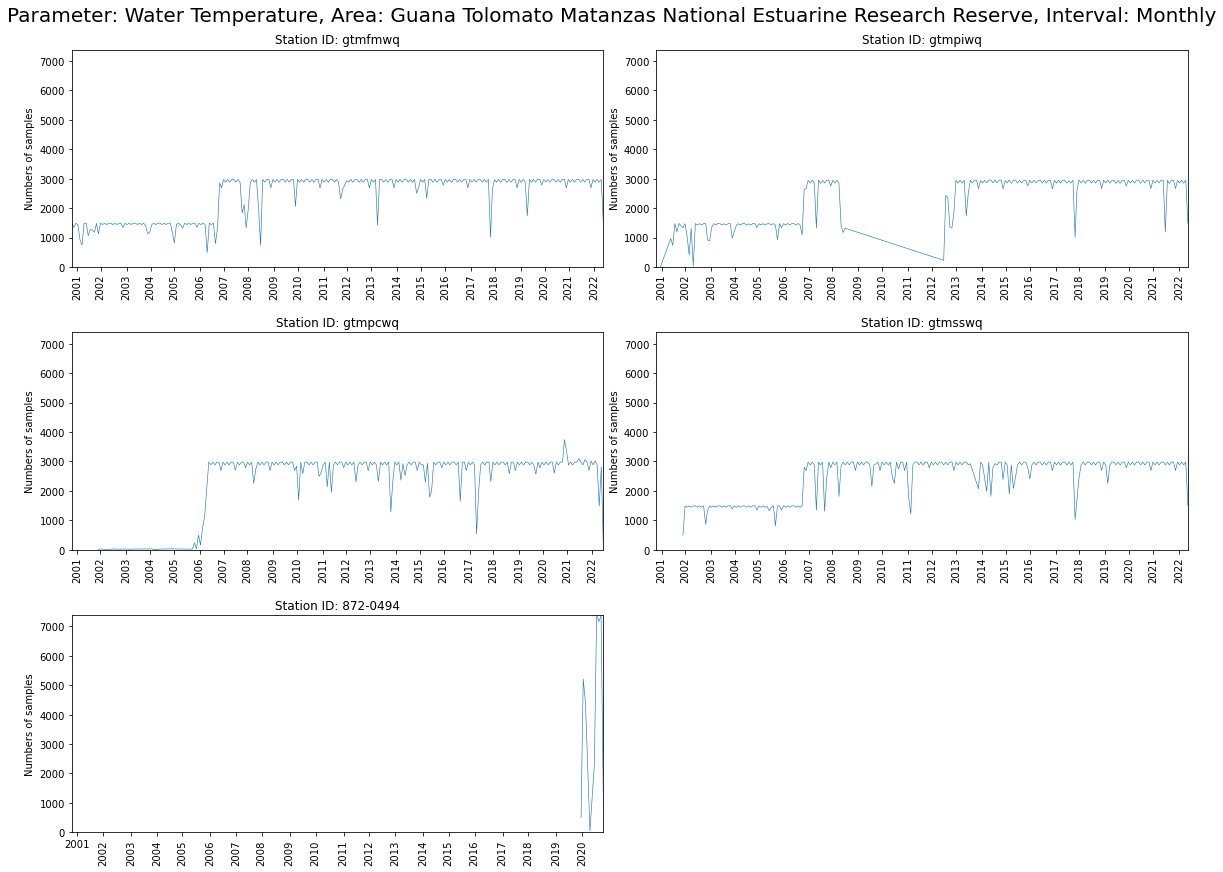

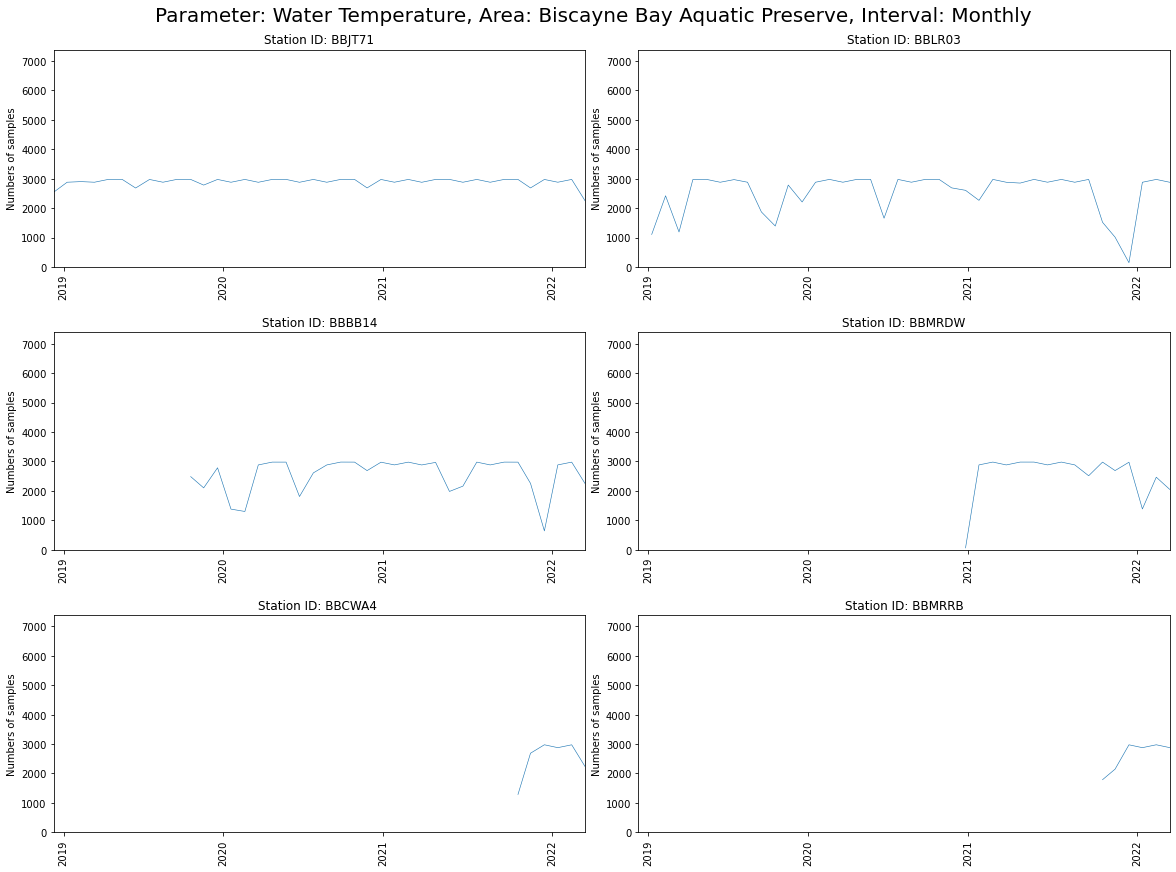

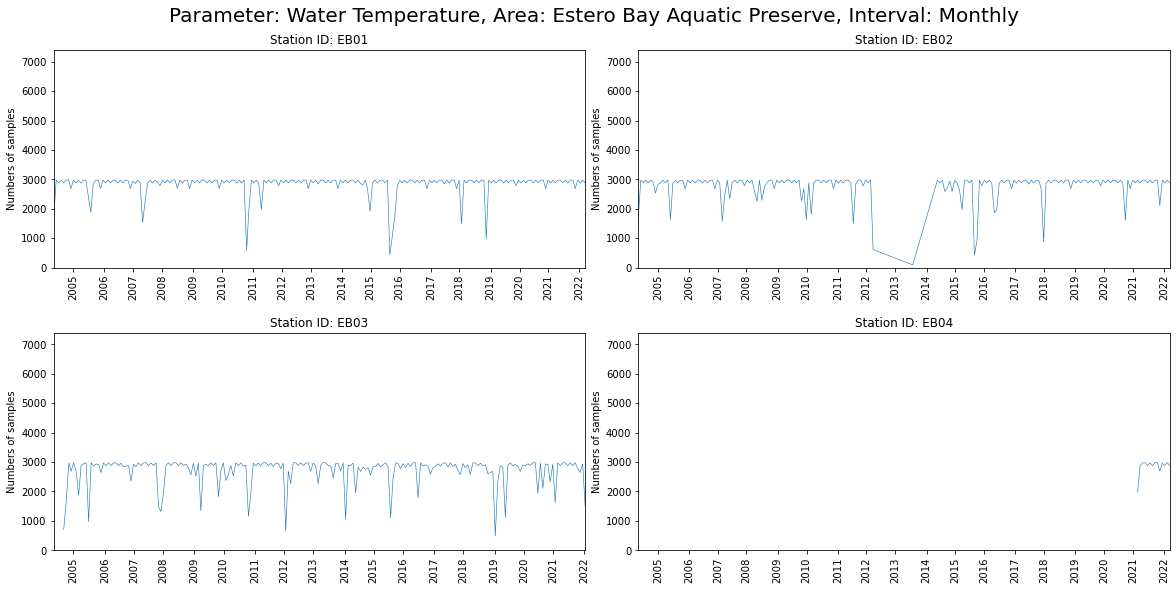

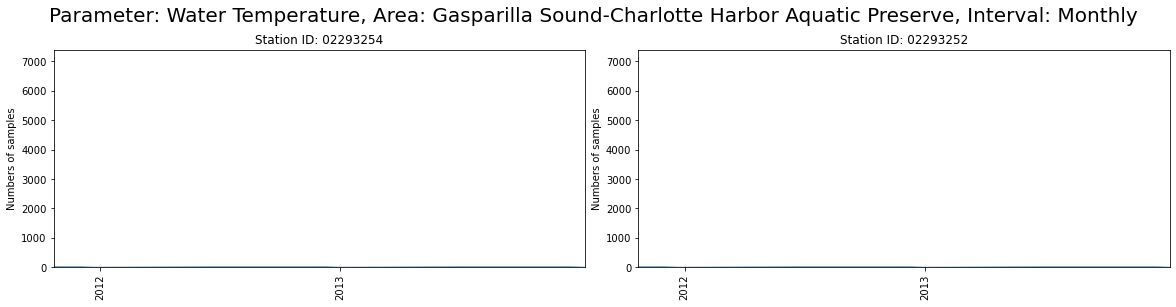

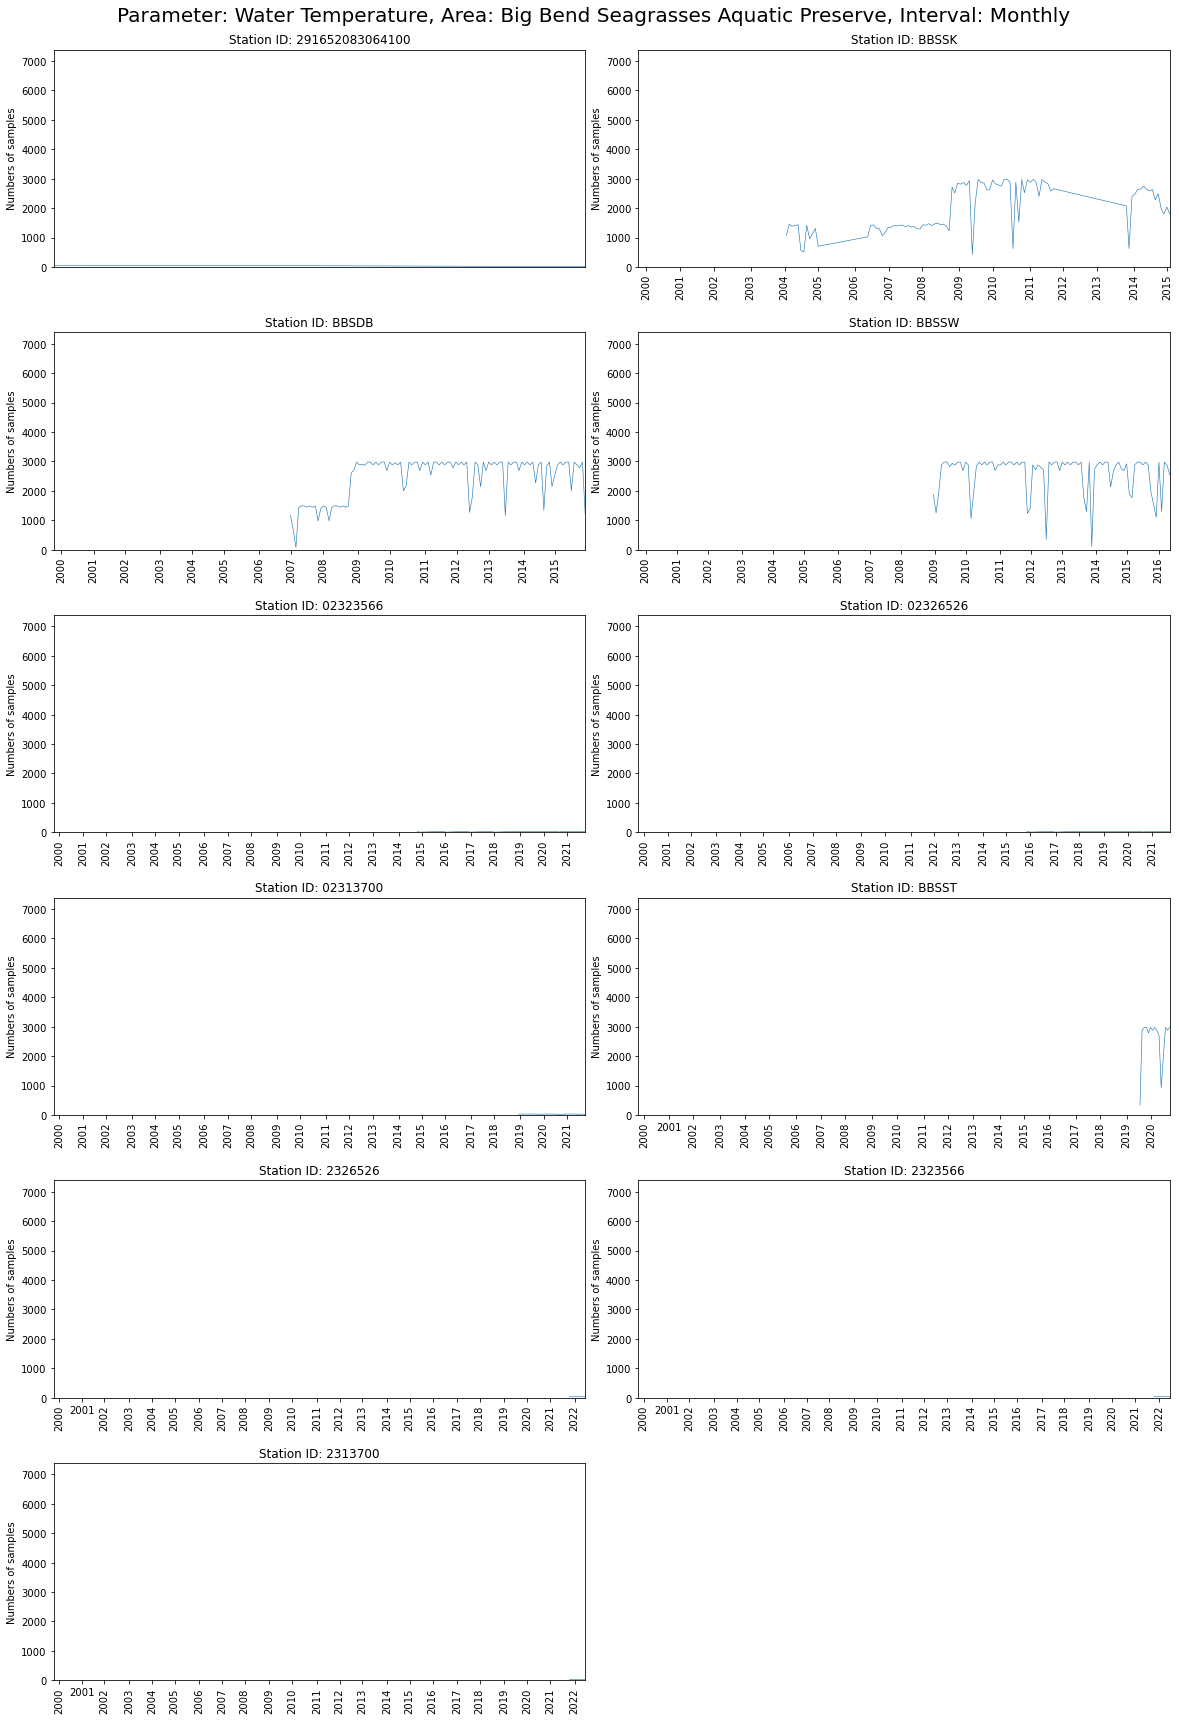

In [27]:
plt.rcParams['figure.figsize'] = [20, 30]
value = listValue[0]
rule  = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc   = RRuleLocator(rule)
for para in listPara:
    for i in range(len(listArea)):
        fig = plt.figure()
        plt.suptitle("Parameter: " + para + ", "+"Area: "+ str(listArea[i])+", Interval: Monthly", fontsize = 20, y = 0.90)
        dfNew = monthly_count[(monthly_count["ParameterName"] == para)&(monthly_count["ManagedAreaName"]== listArea[i])]
        setList = dfNew.ProgramLocationID.unique()
        up_lim = monthly_count[(monthly_count["ParameterName"] == para)]['count'].max()
        for each in range(len(setList)):
            dfEachValue = dfNew[dfNew["ProgramLocationID"]==setList[each]]
            if dfEachValue["ParameterName"].count() != 0:
                ax = fig.add_subplot(6,2,each+1)
                ax.set_title("Station ID: "+str(setList[each]))
                ax.plot(dfEachValue["timestamp"],dfEachValue[str(value)],linewidth=0.6)
                ax.xaxis.set_major_locator(loc)
                plt.xticks(rotation=90)
                ax.set_xlim([dfNew["timestamp"].min(),dfEachValue["timestamp"].max()])
                ax.set_ylim([0,up_lim])
                plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1,hspace=0.3)
                plt.ylabel("Numbers of samples")

### 2.2 Monthly Means (stations combined)

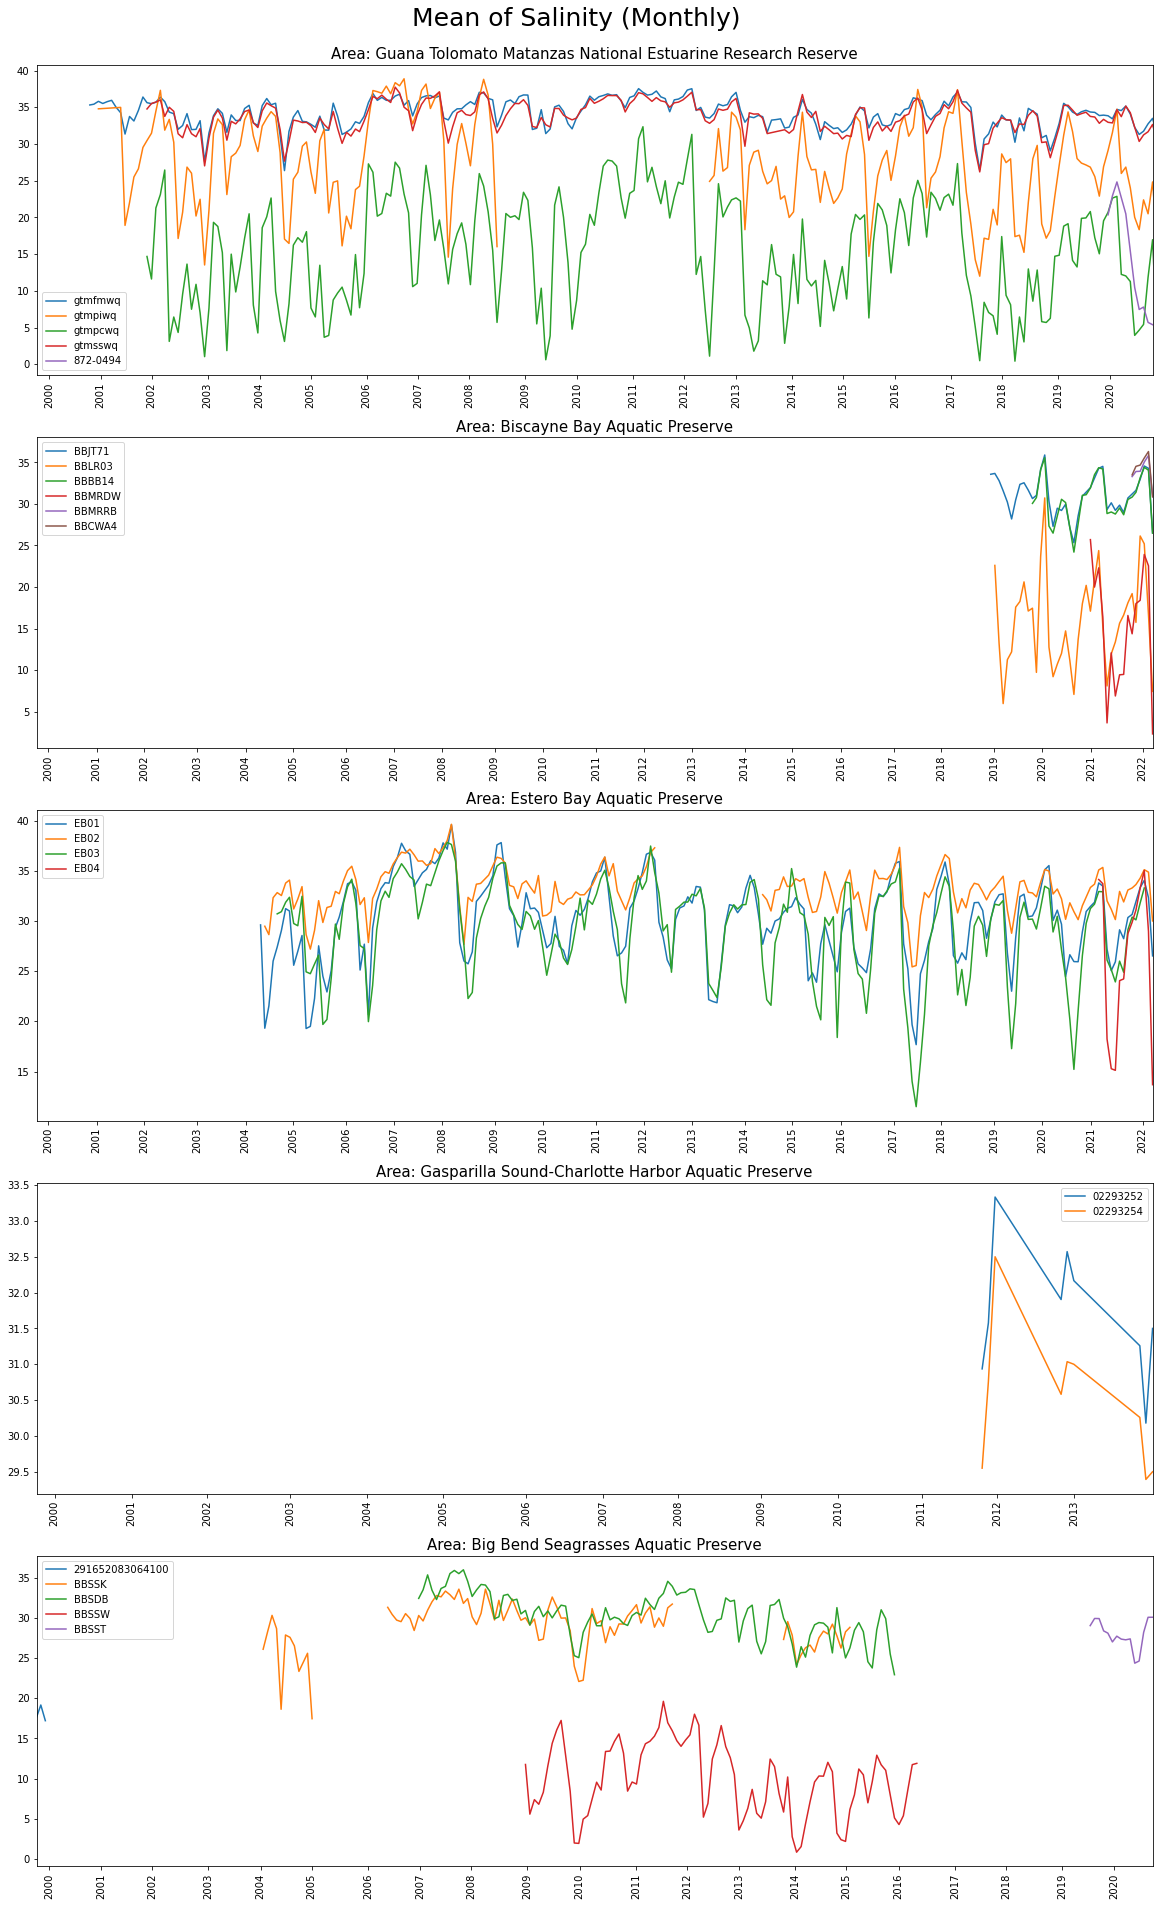

<Figure size 1440x2880 with 0 Axes>

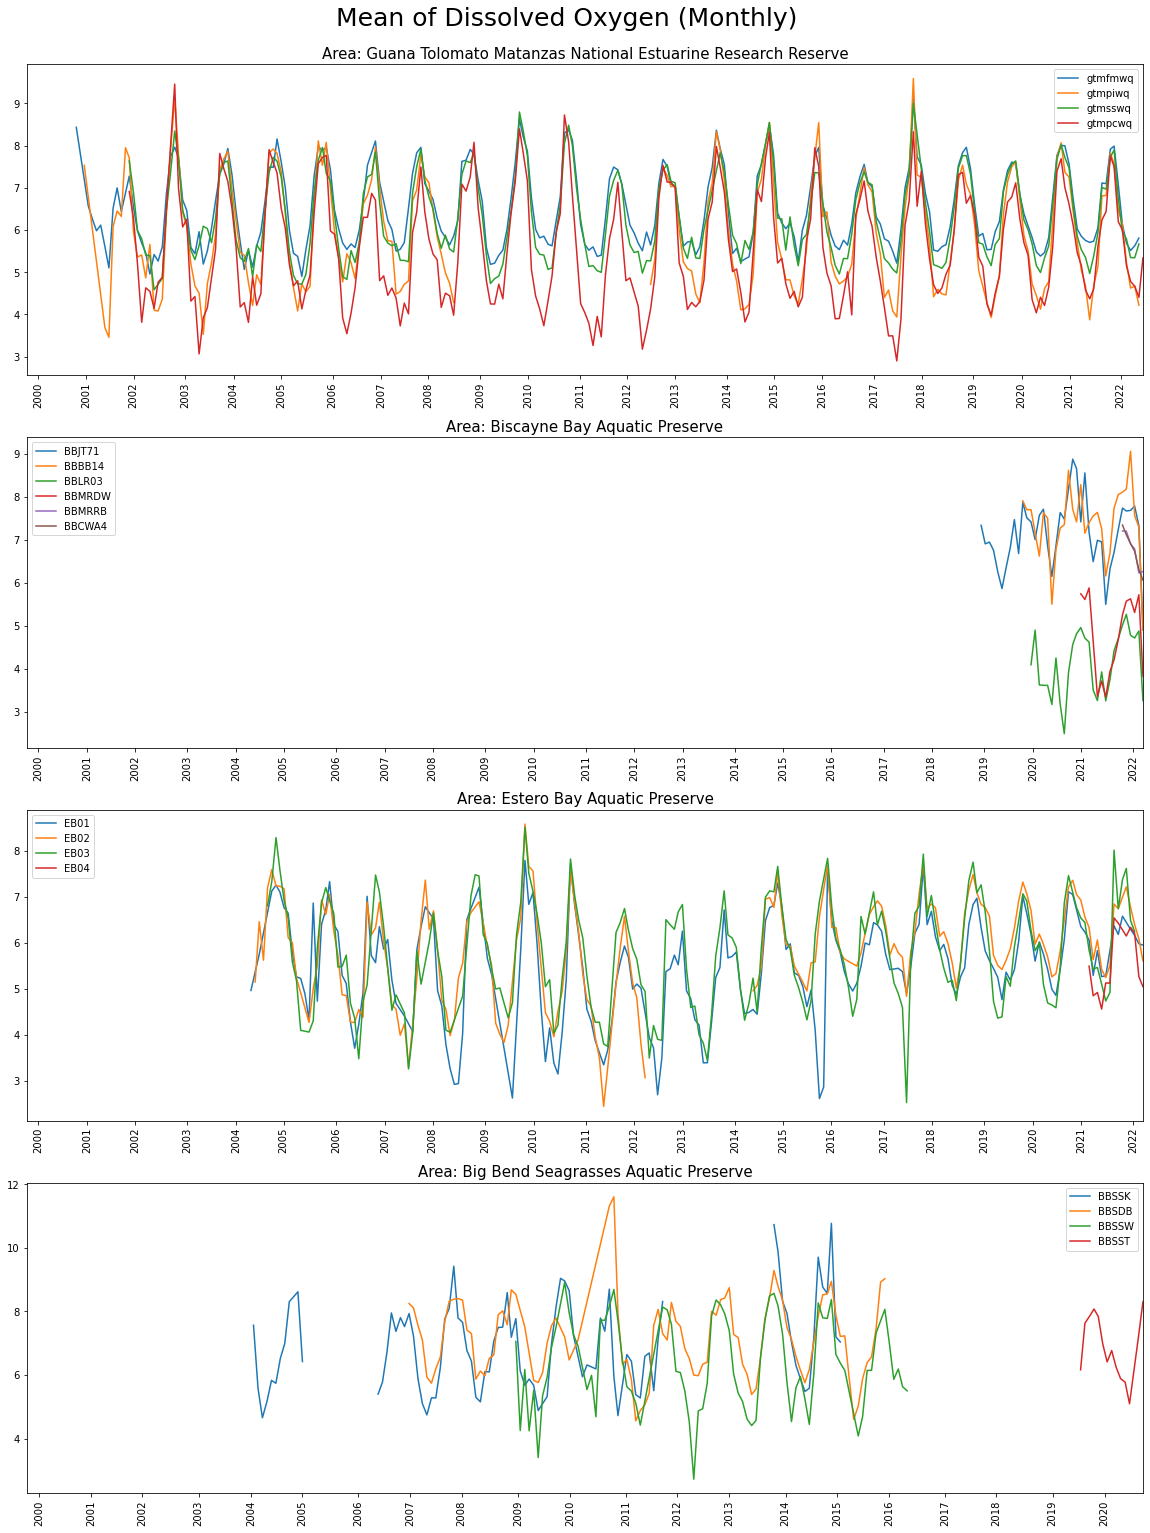

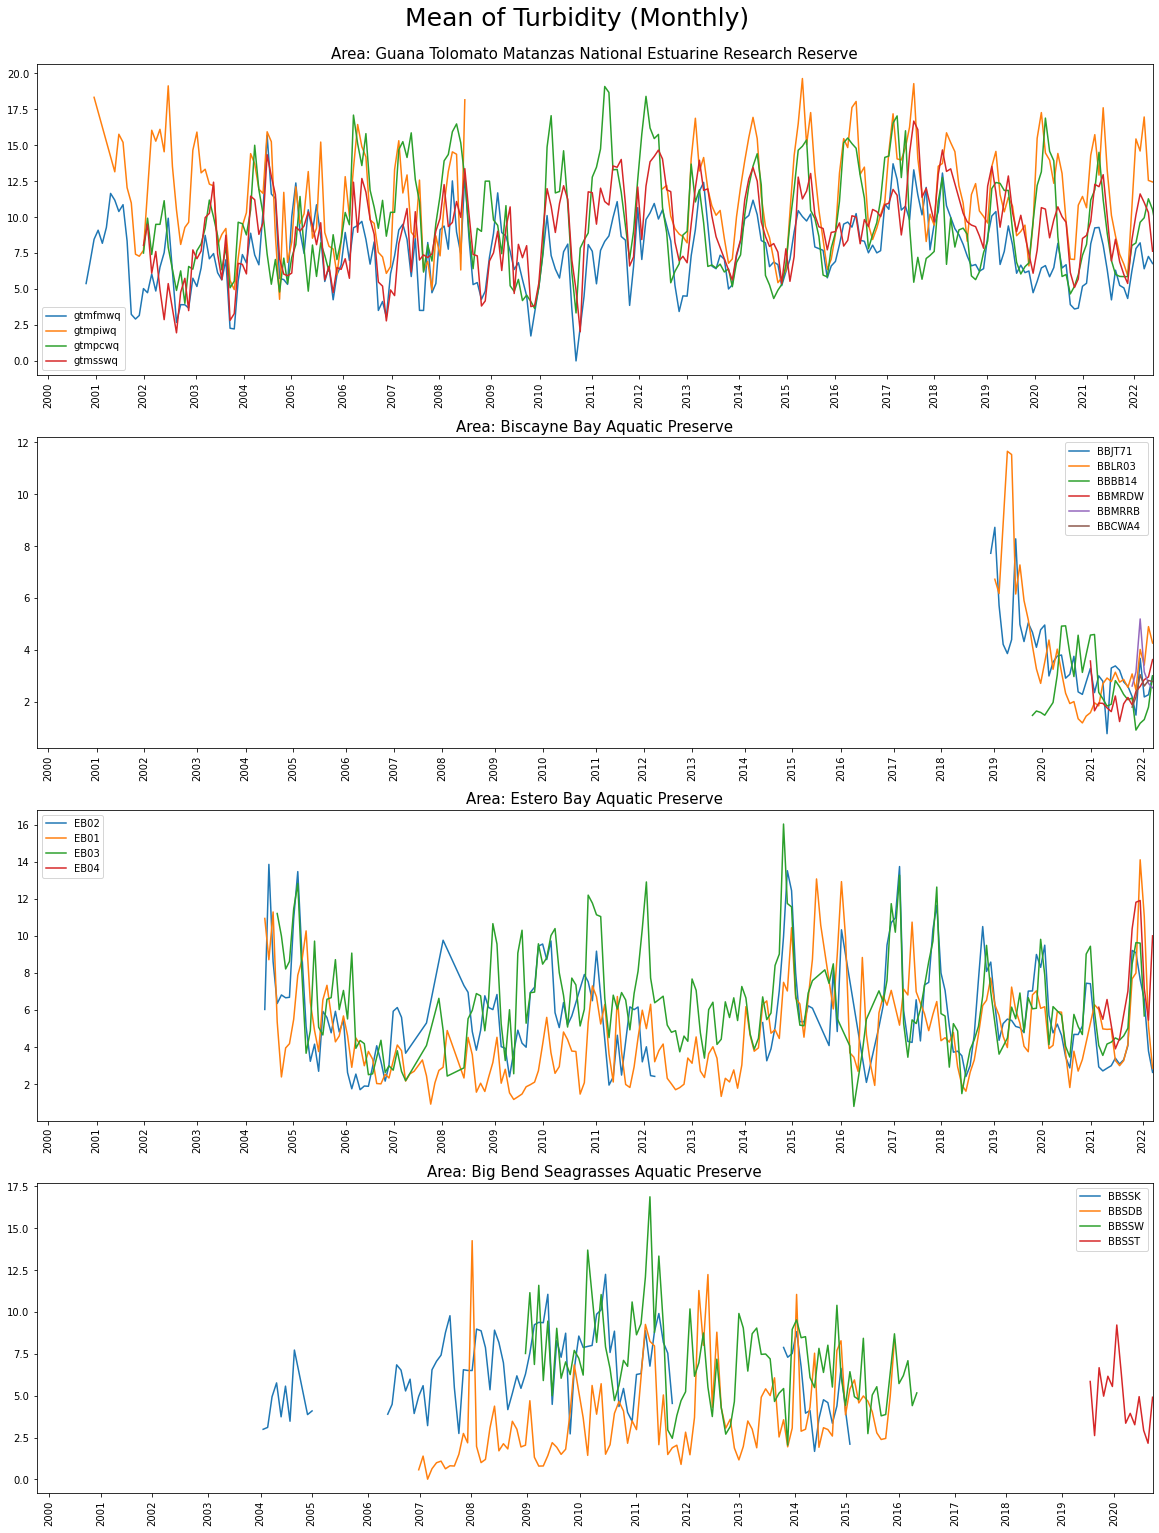

<Figure size 1440x2880 with 0 Axes>

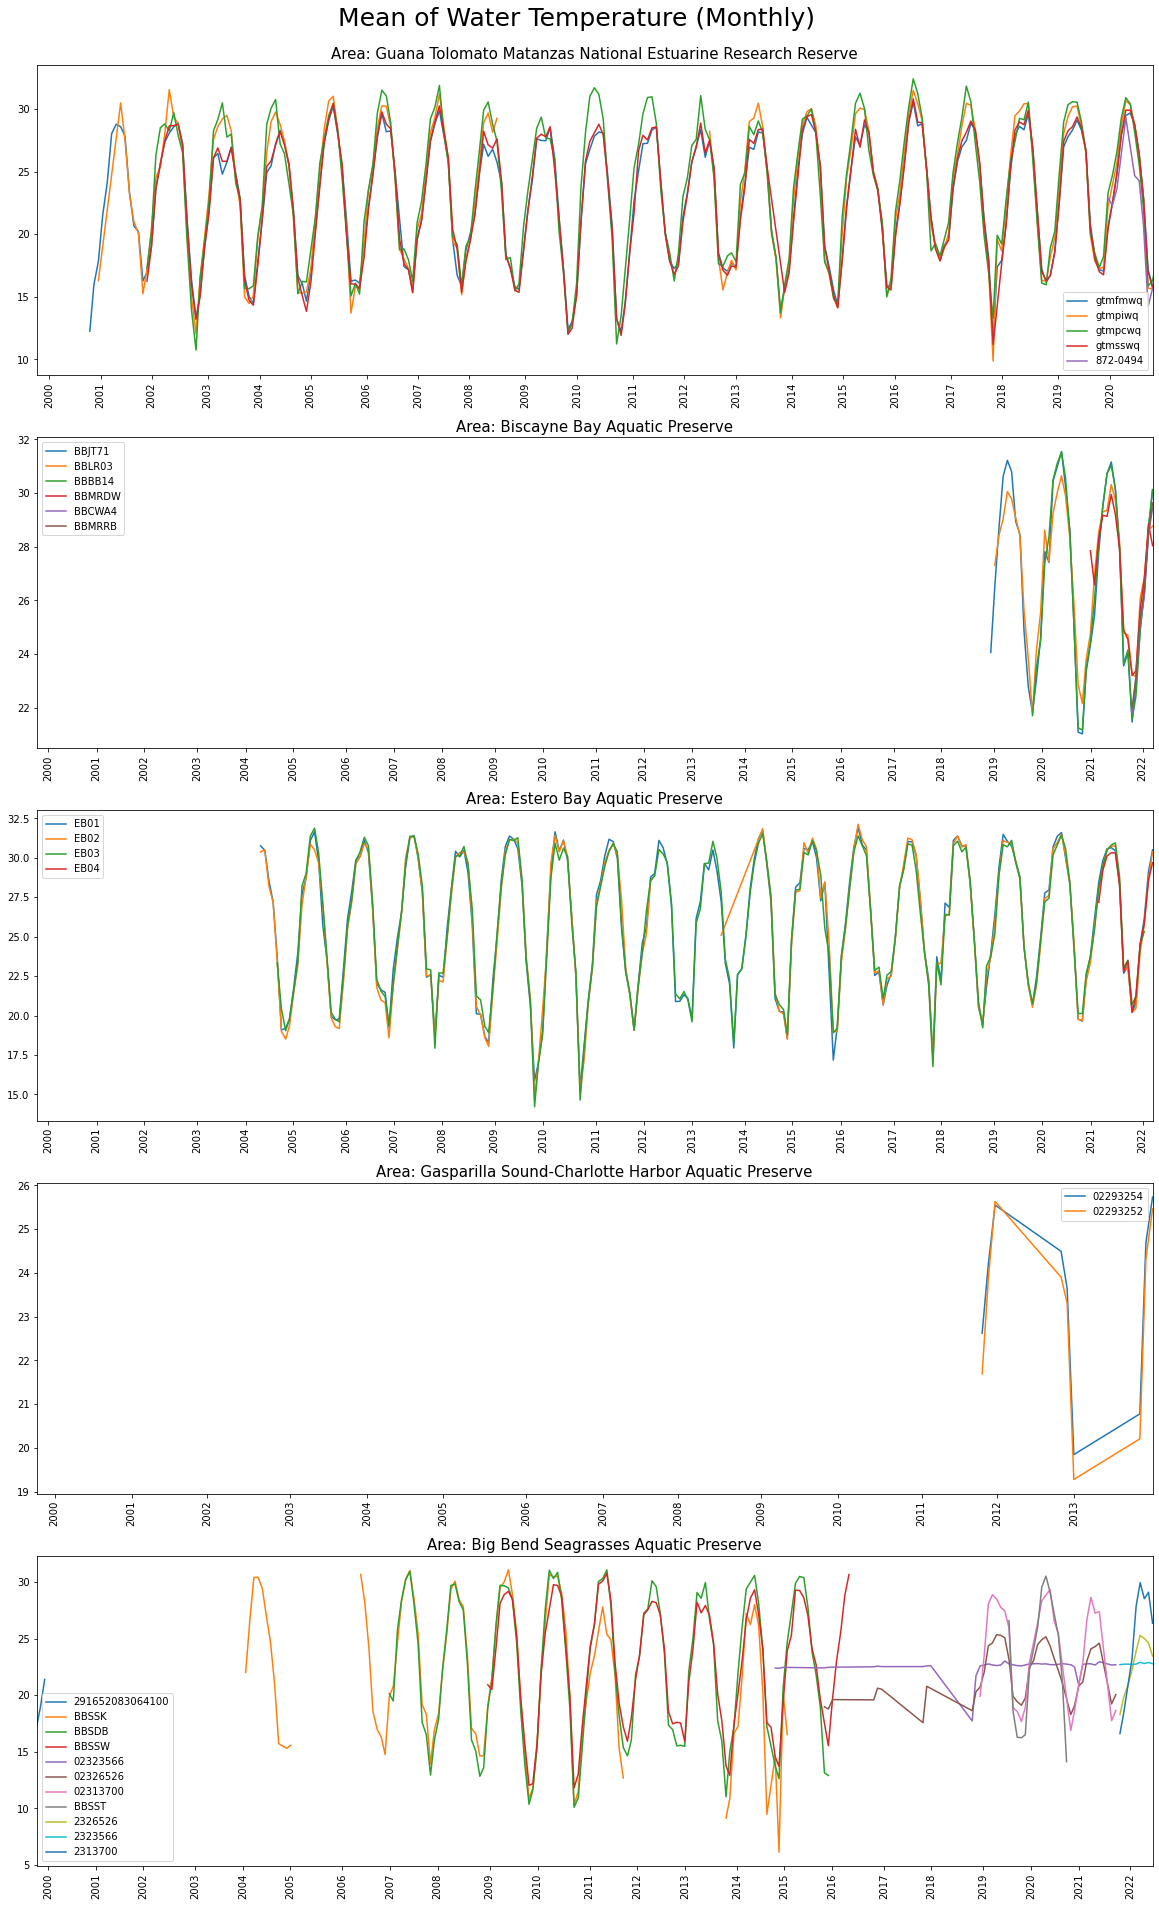

In [129]:
from datetime import datetime
plt.rcParams['figure.figsize'] = [20, 40]
value = listValue[1]
rule  = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc   = RRuleLocator(rule)
for para in listPara:
    fig = plt.figure()
    plt.suptitle("Mean of {} (Monthly)".format(para), fontsize = 25, y = 0.9)
    j = 0
    for i in range(len(listArea)):
        dfNew= monthly_count[(monthly_count["ParameterName"] == para)&(monthly_count["ManagedAreaName"]== listArea[i])]
        setList = dfNew.ProgramLocationID.unique()
        if len(setList) !=0:
            ax = fig.add_subplot(6,1,j+1)
            ax.set_title('Area: '+ str(listArea[i]), size=15)
            for each in range(len(setList)):
                dfEachValue = dfNew[dfNew["ProgramLocationID"]==setList[each]]
                gap_idx = np.where(np.diff(dfEachValue.timestamp.values.astype(float)/(1000000000*3600*24*365)) > 1)[0]
                dfEachValue = pd.DataFrame(
                    columns = dfEachValue.columns, 
                    data = np.insert(dfEachValue.values, gap_idx+1, values=np.nan, axis=0)
                    )
                ax.plot(dfEachValue["timestamp"],dfEachValue[str(value)],label=setList[each])
                ax.legend(loc='best')
                ax.xaxis.set_major_locator(loc)
                plt.xticks(rotation=90)
                ax.set_xlim([monthly_count['timestamp'].min(),dfEachValue["timestamp"].max()])
            j = j+1
            
        # Save figure
        plt.savefig(fig_path+"Monthly_mean_{}".format(para))

### 2.4 Yearly Trend (stations combined)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 40]
value = listValue[1]
rule  = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc   = RRuleLocator(rule)
for para in listPara:
    fig = plt.figure()
    plt.suptitle("Mean of {} (Yearly)".format(para), fontsize = 25, y = 0.9)
    stats = yearly_count[(yearly_count["ParameterName"] == para)]
    up_lim = stats['mean']
    j = 0
    for i in range(len(listArea)):
        dfNew= yearly_count[(yearly_count["ParameterName"] == para)&(yearly_count["ManagedAreaName"]== listArea[i])]
        setList = dfNew.ProgramLocationID.unique()
        if len(setList) !=0:
            ax = fig.add_subplot(6,1,j+1)
            ax.set_title('Area: '+ str(listArea[i]), size=15)
            for each in range(len(setList)):
                dfEachValue = dfNew[dfNew["ProgramLocationID"]==setList[each]]
                ax.plot(dfEachValue["timestamp"],dfEachValue[str(value)],label=setList[each])
                ax.legend(loc='best')
                ax.xaxis.set_major_locator(loc)
                plt.xticks(rotation=90)
                ax.set_xlim([yearly_count['timestamp'].min(),dfEachValue["timestamp"].max()])
            j = j+1

### 2.5 Statistics by Months (all stations)

The following boxplots are statistics in the same months in different years. 

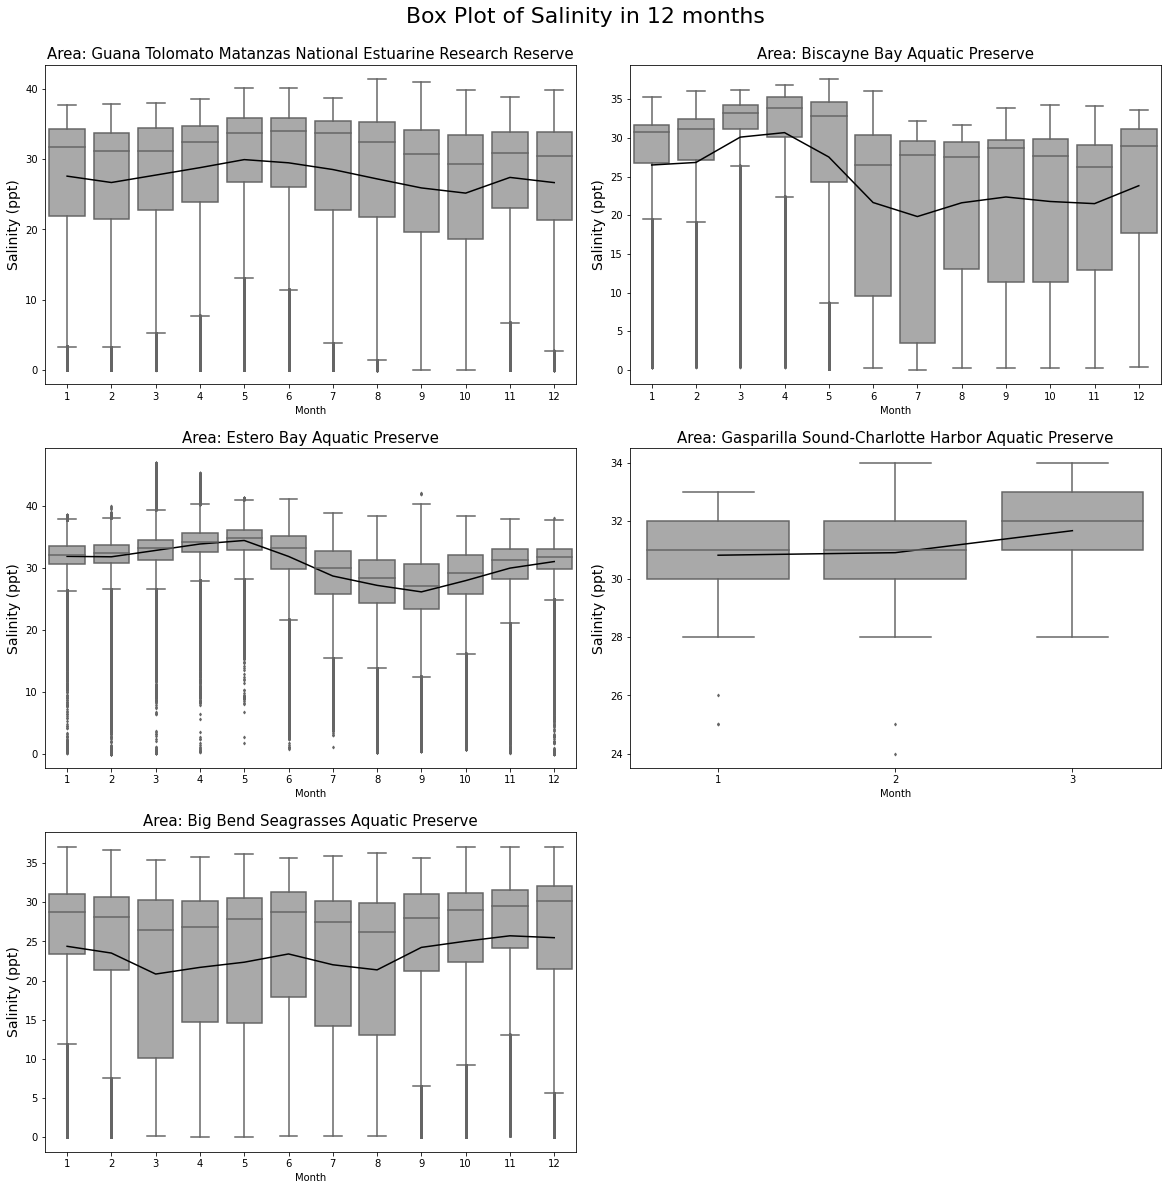

<Figure size 1440x1440 with 0 Axes>

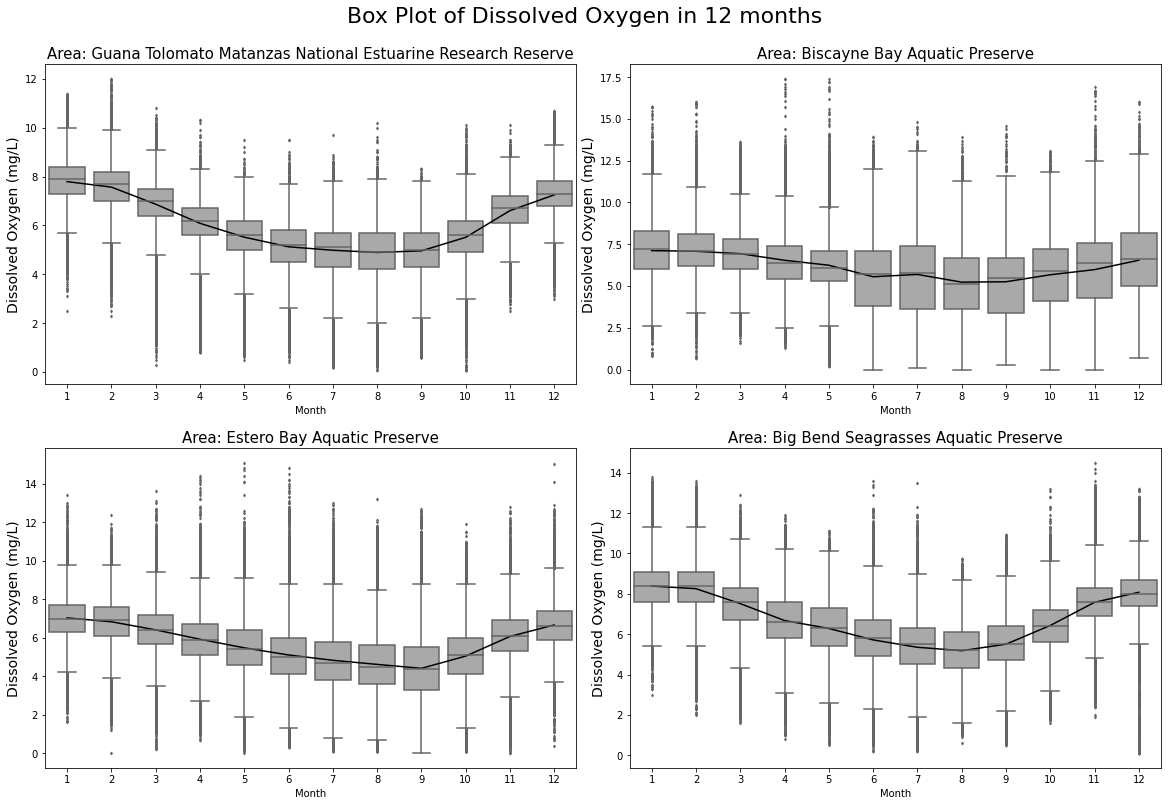

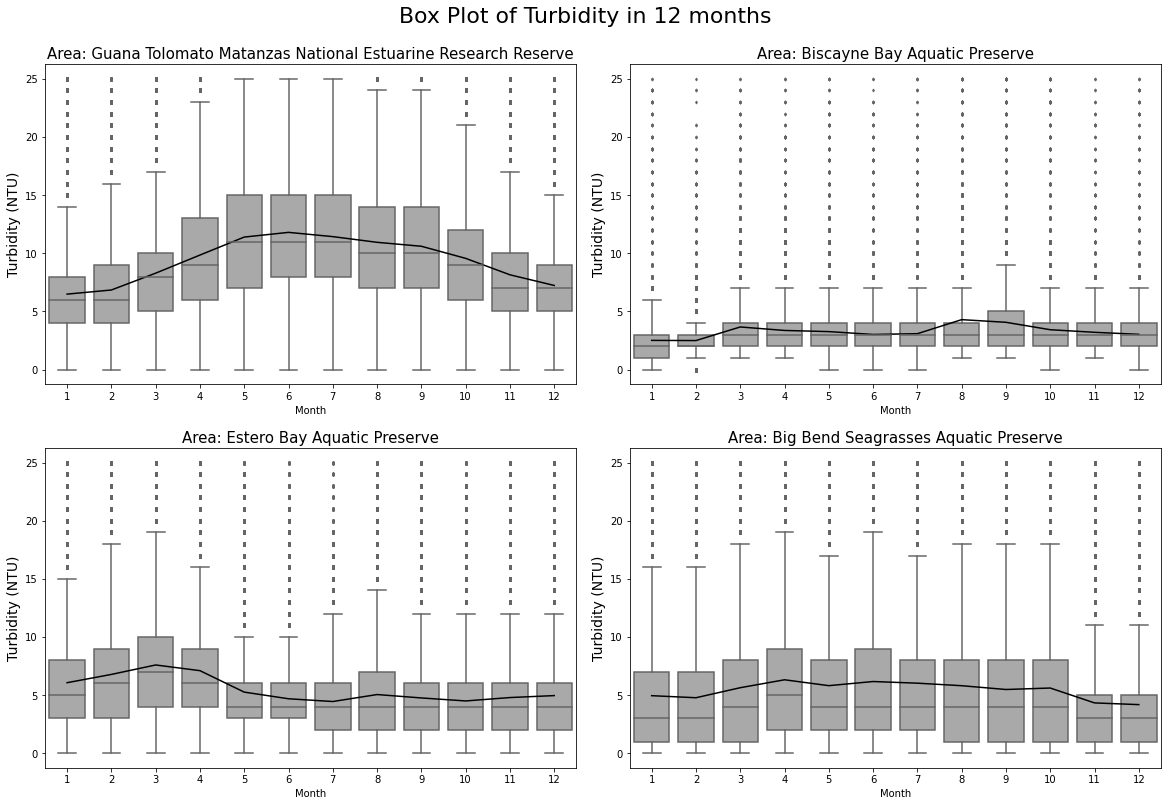

<Figure size 1440x1440 with 0 Axes>

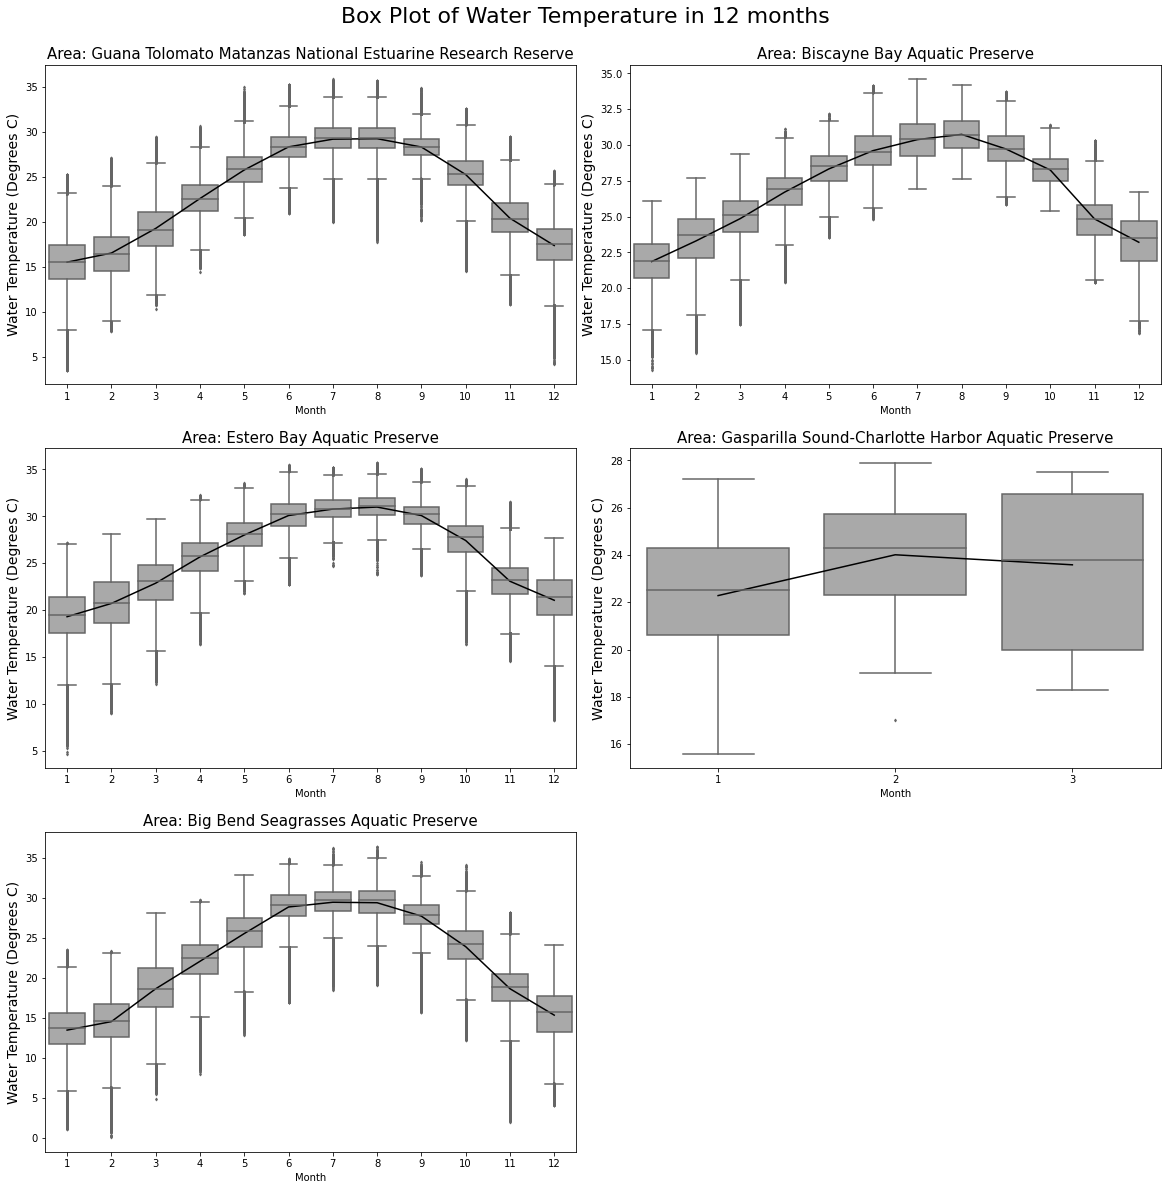

In [120]:
plt.rcParams['figure.figsize'] = [20, 20]
# Group the data by each month
df3 = df2.groupby(["Month","ManagedAreaName","ParameterName"])["ResultValue"].agg([
    "count","max","min","mean","std"]).reset_index()
for para in listPara:
    fig = plt.figure()
    plt.suptitle("Box Plot of {} in 12 months".format(para), fontsize = 22, y = 0.92)
    i=0
    for area in listArea:
        df4 = df2[(df2["ManagedAreaName"]==area)&(df2["ParameterName"]==para)]
        df3_slct = df3[(df3["ManagedAreaName"]==area)&(df3["ParameterName"]==para)]
        if df3_slct["ParameterName"].count() != 0:
#         print(str(df3_slct["ParameterName"].count())+"     "+para)
            ax = fig.add_subplot(3,2,i+1)
            sns.boxplot(x=df4["Month"], y=df4["ResultValue"],orient='v',color='darkgray',fliersize=2, ax = ax)
            sns.lineplot(x=df3_slct["Month"]-1, y=df3_slct["mean"],color='black',ax=ax)
            ax.set_title("Area: {}".format(area), size=15) # Title
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)
            plt.ylabel("{} ({})".format(para,dictUnits[para]), size = 14)        
            i = i + 1

### 2.5 Statistics by Months (separate stations)

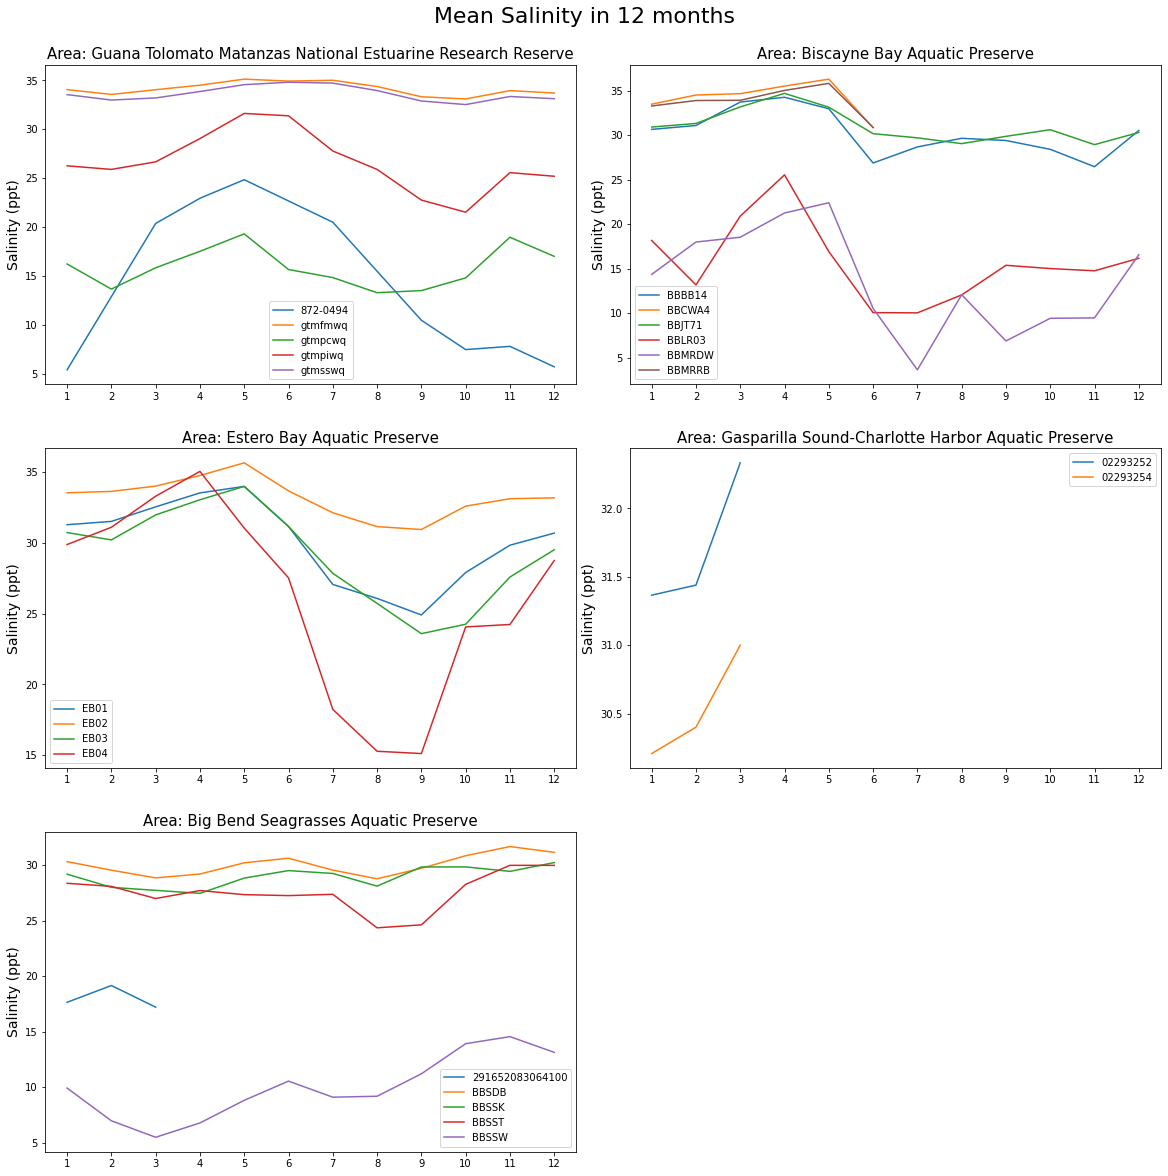

<Figure size 1440x1440 with 0 Axes>

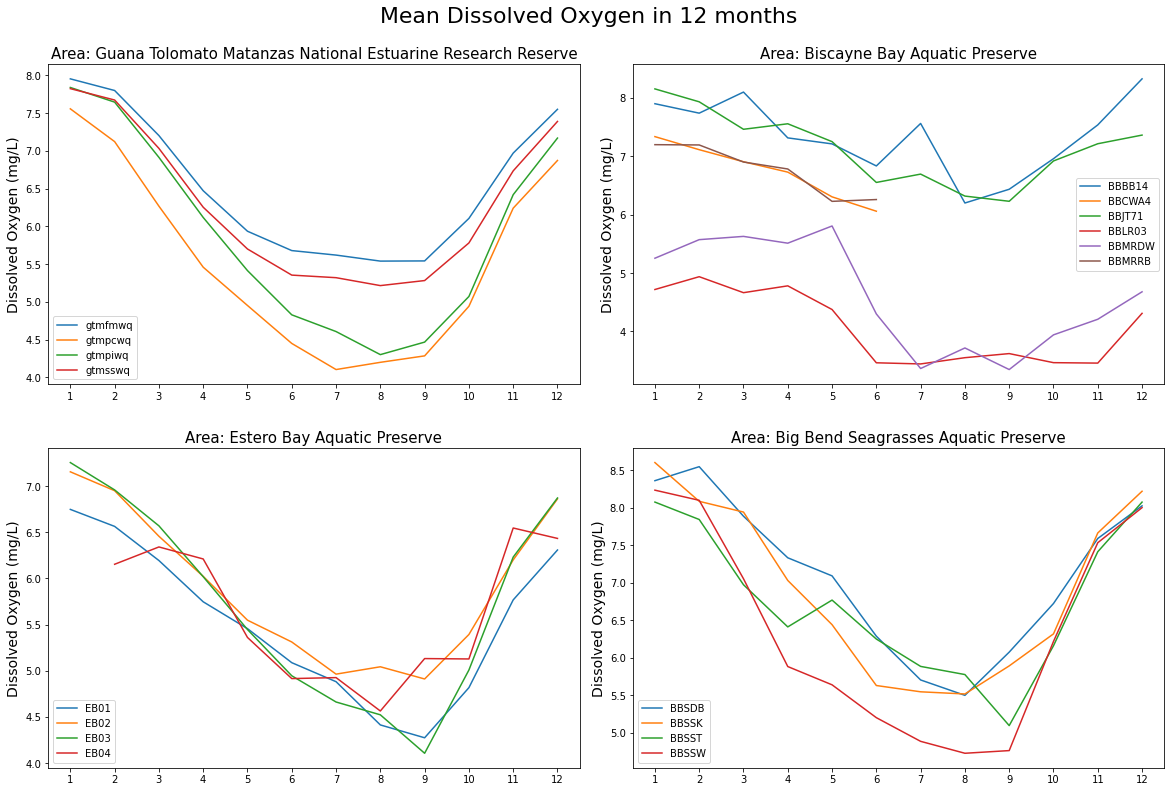

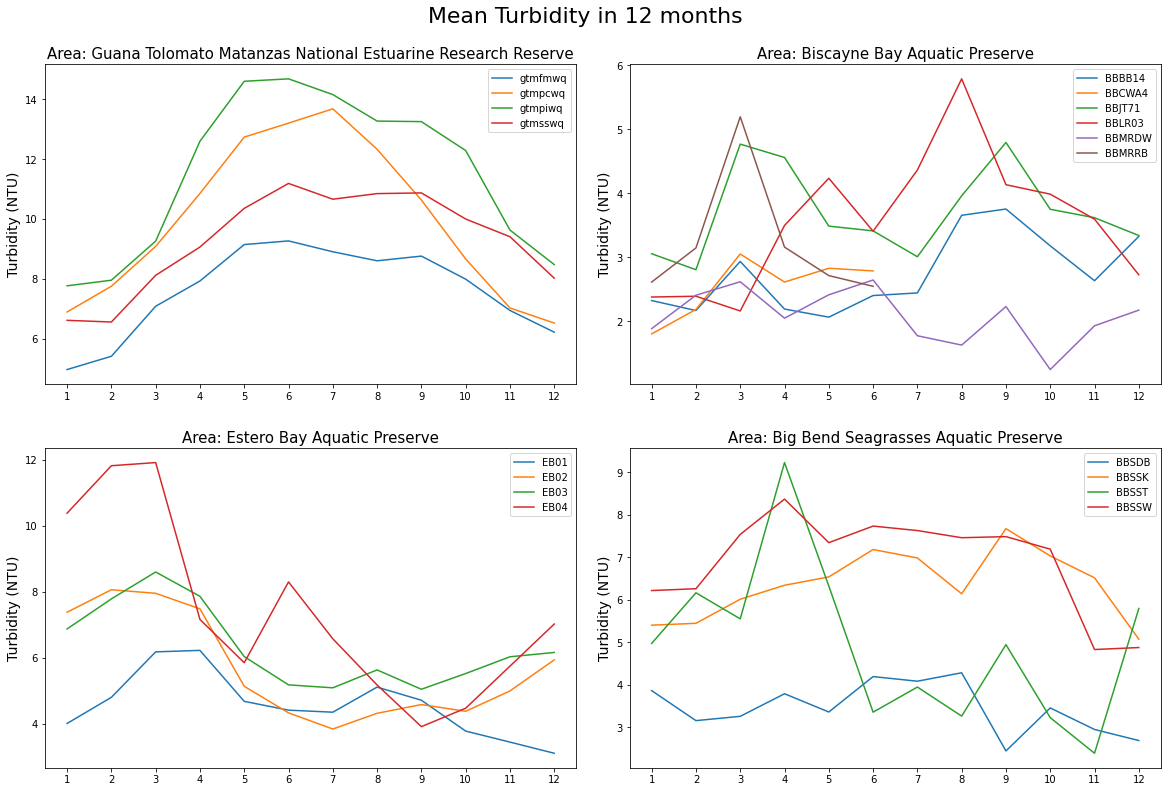

<Figure size 1440x1440 with 0 Axes>

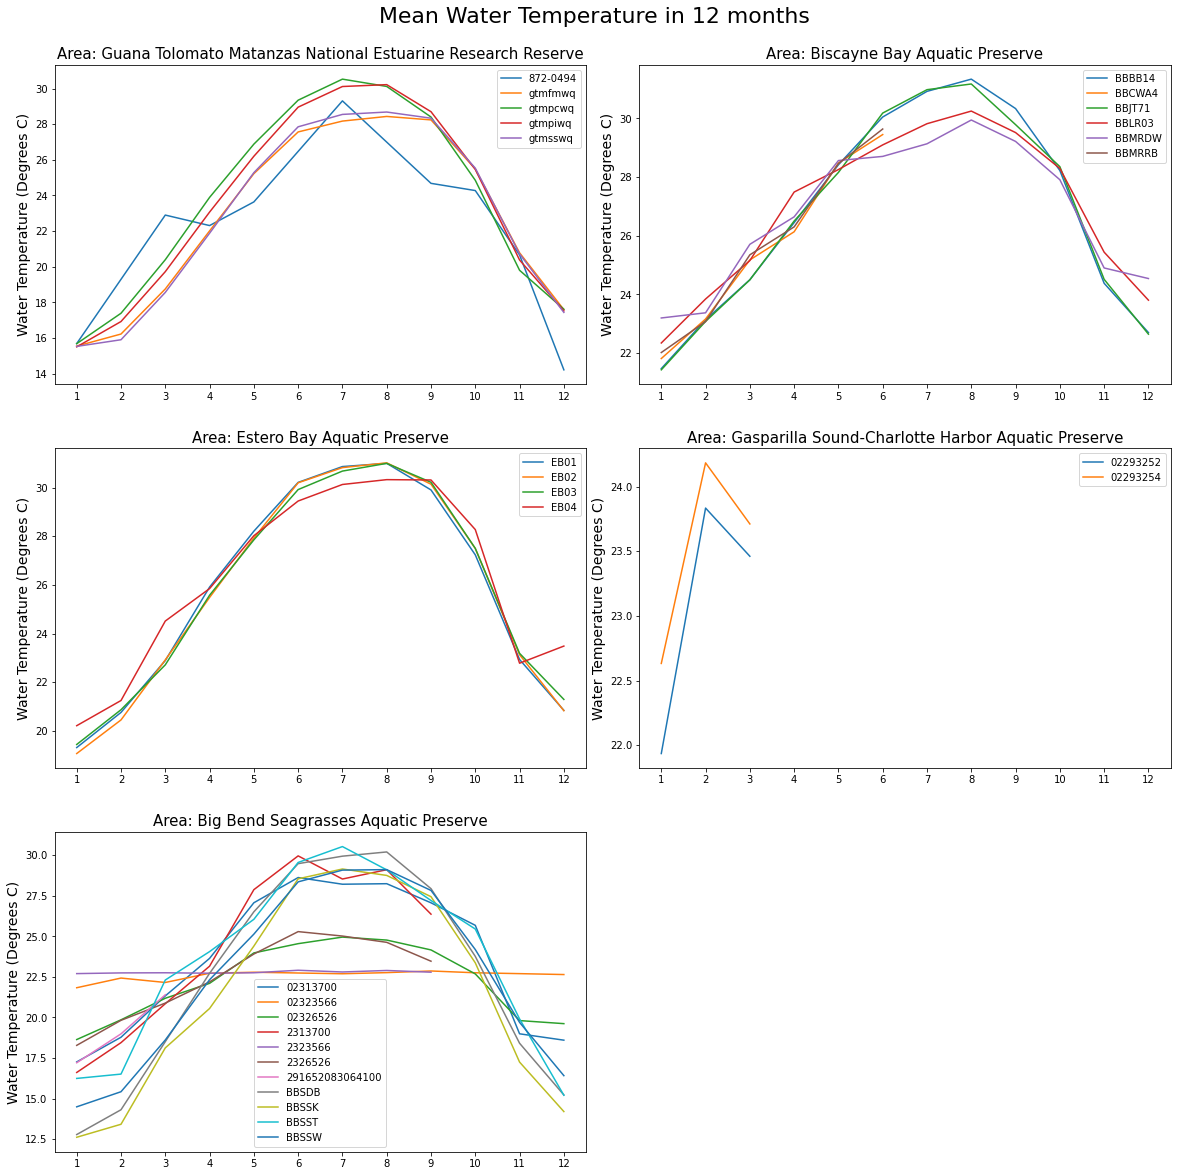

In [130]:
plt.rcParams['figure.figsize'] = [20, 20]
df3 = df2.groupby(["Month","ManagedAreaName","ParameterName","ProgramLocationID"])["ResultValue"].agg([
    "count","max","min","mean","std"]).reset_index()
x_major_locator = plt.MultipleLocator(1)
for para in listPara:
    fig = plt.figure()
    i=0
    for area in listArea:
        plt.suptitle("Mean {} in 12 months".format(para), fontsize = 22, y = 0.92)
        dfNew = df3[(df3["ManagedAreaName"]==area)&(df3["ParameterName"]==para)]
        setList = dfNew.ProgramLocationID.unique()
        if len(setList) !=0:
            ax = fig.add_subplot(3,2,i+1)
            ax.set_title('Area: '+ area, size=15)
            i +=1
            j = 0
            for each in range(len(setList)):
                dfEachValue = dfNew[dfNew["ProgramLocationID"]==setList[each]]
                ax.plot(dfEachValue["Month"],dfEachValue["mean"],label=setList[each])
                ax.set_xlim(0.5,12.5)
                ax.legend(loc='best')
                ax.xaxis.set_major_locator(x_major_locator)
                plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)
                plt.ylabel("{} ({})".format(para,dictUnits[para]), size = 14)        
                ax.set_title('Area: '+ area, size=15)
                j = j+1